# MTH739 – Topics in Scientific Computing – Semester A 2023/24

## Coursework 2 : Breather solutions to the Sine Gordon equation

## Section 1 : Instructions and important information

### 1.1 Important information about this project assignment

This is the assignment for the second coursework of MTH739 – Topics in Scientific Computing. This assignment is scored on a scale of 100, and will contribute 80% of your final mark.

Please read carefully through the paragraphs below, since they contain very important information about the submission deadline, procedures, expectations, etc.

### 1.2 Expectations

The project consists of 4 sections, each containing several questions. You are expected and encouraged to attempt every section and question of this assignment. Fractional marks may be awarded for meaningful partial solutions.

You are expected to provide working Python code that answers each question, and to accompany your code with appropriate explanations and comments. In particular, you should provide at least a brief text paragraph (using the markdown cells) that explains what you did, and you should use appropriate naming and include meaningful comments inside your code where necessary, to make it clear what the code does. Failing to provide comments and/or explanations will result in a partial loss of marks. Marks will also be available for defensive programming techniques including asserts and tests of key functionality, where appropriate.

The marks available for each section and each question are indicated. Broadly speaking, for each section, the marks available will be split as follows:

   - 50% for working code that correctly implements all of the requested numerical studies
   - 20% for use of defensive programming techniques - asserts and tests implemented to prevent user error and check functioning correctly
   - 20% for readability of code, following the agreed naming conventions of the course, appropriate commenting
   - 10% for appropriate explanations of the code or techniques implemented in markdown format around the code.

Please read all sections and each question carefully before attempting an answer. This will help you to avoid misinterpreting the questions and you may be able to make your code more flexible at an earlier stage in order to be able to use it more efficiently later on.

In some questions you are asked to develop your own code to solve a problem, even though python may already have a library function that performs the same task. Since the goal is to show that you understand the methods and how they are implemented, you should in general write your own code for an algorithm from scratch unless use of a specific function is indicated (obviously still using basic numpy, scipy and sympy functions like `np.sin()`, `np.array()`, `sp.symbol()` etc!). As a general rule, I would recommend that you **do not use any functions outside of the sympy, numpy, matplotlib and scipy libraries**, as if you do you will very probably miss marks for showing how you implement the solution. This should be clear from the context but if you are in any doubt, **just ask**.

### 1.3 Submission procedure

You must use **this Jupyter Notebook** to develop your project, answer the questions, write the corresponding code, present the result in accordance to the requirements of each question, and include your comments and explanations.

You are not allowed to remove any cell from the present notebook. However, you can add as many text or code cells as needed.
You are expected to submit this Jupyter Notebook filled in with all your code, answers, comments, and nothing else. Please **do not rename this file** - all the submissions are automatically associated to your QMPlus Student ID and so you do not need to add any identifier. Note that you cannot submit any additional file.

All the submissions must be performed through QMPlus, using the appropriate submission system for this assignment -
you cannot submit your attempt in any other way! Submissions received through other means, including emails **will not be considered and will score a zero**.
Please read through the paragraph below about the submission deadline and the late submission policy.

### 1.4 Submission deadline

The submission deadline for this coursework is **17:00 UTC on Friday 19 January**.

Submissions received after that deadline will be treated in accordance with the College Regulations concerning late submissions. This means that late submissions will incur a penalty of 5% of the total marks for every day of delay (or fraction thereof), up to seven days after the submission deadline. For instance, a submission received with 25 hours of delay will incur a penalty of 10 marks of the 100 available. Any submission received more than 168 hours after the deadline stated above will score a zero.

The lecturer will be available to answer reasonable questions about this assignment up until Thursday 11th January 2023. You can contact the lecturer via email at _k.clough@qmul.ac.uk_.

### 1.5 Third-party material and plagiarism policy

You must work independently on your project, and your submission should include only original material, code and comments, that you have produced by yourself. You are allowed to use any sources (books, internet, Google, etc.) to help you in completing this project, but you must cite them appropriately. The same applies to published code: if you use any publicly available code from a third party, you must cite the source appropriately, and specify what is your original contribution.

You are allowed to discuss the general approach to a question with your colleagues, but you cannot share your own code with colleagues or reuse code produced by your colleagues for this assignment.

Queen Mary University of London has in place a very efficient system for automatic plagiarism detection, which draws on a database of several million books, webpages, research articles, dissertations, and submissions to university-level modules from all over the world. All the material submitted for assessment is automatically processed by this system, which produces a detailed plagiarism report. If I suspect that any of the submitted material is plagiarised, the marks of the corresponding piece of assessment will be withheld until you can demonstrate that the code or material is genuinely your own. Any suspect case of copying or plagiarism will be referred to the School and the College for investigation. The typical outcome of a plagiarism investigation might be the failure of the corresponding piece of assessment, the failure of the module, or even the withdrawal of an awarded title and the expulsion from the College in more serious cases. Please refer to the QMUL Academic Regulations for more information about the definition of plagiarism and the relative penalties: https://arcs.qmul.ac.uk/students/student-appeals/assessment-offences/index.html

## Section 2 : Coursework background and questions

### 2.1 Background

The broad goal of the coursework is to use the techniques we have learned in the course to study the solutions to a particular non linear partial differential equation called [the Sine-Gordon equation](https://en.wikipedia.org/wiki/Sine-Gordon_equation). 

Once complete, the notebook should provide a self contained report on your numerical investigations and provide relevant commentary in markdown cells around it that would enable another student to understand, run and make basic modifications to the notebook.

The Sine Gordon equation is as follows:

<a id="eq_1"></a>
$ \frac{\partial\varphi^2}{\partial t^2} -\frac{\partial\varphi^2}{\partial x^2}+\sin \varphi =0, \quad (1)$

and the breather solutions we will study have the form:

<a id="eq_2"></a>
$ \varphi (x,t)=4\arctan \left({\frac {{\sqrt {1-\omega ^{2}}}\;\cos(\omega t)}{\omega \;\cosh({\sqrt {1-\omega ^{2}}}\;x)}}\right), \quad (2)$

with <b>$\omega$ a positive constant with a value less than 1 [ASSERT]</b>. In the coursework you should set $\omega=0.5$ unless otherwise specified.

Eq. (2) (the breather solution) can be used to construct initial data for the initial value problem for Eq. (1) (the PDE). If you correctly implement the time evolution of this data, you should find that it is stable - the evolution is described exactly by the breather solution, which oscillates in time but with the envelope of the function remaining stable. This provides a very good <b>test</b> that the code is working correctly, meaning that you can then confidently use it for different initial data for the same PDE, for which no exact solution exists. Implementing known solutions is a very good way to test a numerical code.

The following analytic results for the breather solution in Eq. (2) may be useful:

Let $A = \sqrt {1-\omega ^{2}}$, then

<a id="eq_3"></a>
$ \frac{\partial\varphi (x,t)}{\partial x}= \frac{-8\omega A^2 \cos(\omega t)\sinh(Ax)}
{2 (A \cos(\omega t))^2 +  \omega^2 +  \omega^2 \cosh{2Ax}} \quad (3)$

<a id="eq_4"></a>
$ \frac{\partial\varphi (x,t)}{\partial t}= \frac{-4 A \sin(\omega t)}
{\cosh{Ax} \left(1 + \left(\frac{A \cos{wt}}{\omega \cosh{Ax}}\right)^2 \right)} \quad (4)$


### 2.2 Coursework sections (4 questions, total marks 100)

In [1]:
# IMPORTS

# Come with any standard Python installation
import time
import doctest
import colorsys
from pprint import pprint
from functools import cache

# Come with any standard Python installation version 3.7 or later. Assuming we are using Python 3.8 or later
from dataclasses import dataclass   # Enforce immutability

# Commonly used Python libraries. Assuming we already have this installed
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy

# %matplotlib notebook  # This is supposed to add some interactability to the plots within the notebook, but it did not work for me.
# # Please feel free to uncomment to see if it works on your machine.

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

#### 2.2.1 Q1 Interpolation (28 marks for 5 parts (a)-(e)):

**Q1a**. Write a class that implements the breather solution in Eq. (2) above. Think about the appropriate attributes and methods that such a class should have - it may help you to read forward through the instructions to see what methods may be needed. You can also always come back and add more methods/attributes here if you find you need them at a later date.

   As a minimum, you should have methods to return the values of the function at a given time, and for a given set of spatial coordinates, and its time and spatial derivatives. Add a plot to demonstrate how these functions work.

**Q1a Answer**

**`BreatherSolutionCalculator` class**

<!-- Write some notes on why you have chosen to implement the class in this way... -->

The main functionality of this class is to compute the breather solution and its derivatives using equations [$(2)$](#eq_2), [$(3)$](#eq_3) and [$(4)$](#eq_4).

The class has only one attribute `omega` which is defined by the user. For the most part of the coursework we will use `omega = 0.5`.
  
<!-- I decided to use `sympy.diff` instead of coding the derivative explicitly because it is less error prone and more general. If I change the breather solution to something else, I don't have to change the derivative. I also don't have to worry about the order of operations, which is a common source of error when coding derivatives explicitly. The auto-generated `numpy` derivative function might be more optimised as well??? However this might reduce understanding. -->

An implementation strategy is to write the formula into code using `numpy`. However, I decided to use `sympy` and take advantage of its built-in functionality to compute derivatives. This is less error-prone compared to explicitly re-writing a long formula. After obtaining the formula with `sympy`, I will convert it to a `numpy` function for better performance. This also allows for computing higher-order derivatives without having to derive the equations.

A potential drawback of this approach is that it could also reduce readability.

For comparison, an explicit way to implement the derivative might look as follows:
  
```python
def compute_space_1st_derivative_dphi_dx(self, x, t):
    cos_omega_t = np.cos(omega*t)
    cosh_A_x = np.cosh(A*x)
    sin_omega_t = np.sin(omega*t)
    upper = -8.0 * omega * A**2 * cos_omega_t * np.sinh(A*x)
    lower = 2.0 * (A * cos_omega_t)**2 + omega**2 + omega**2 * np.cosh(2.0 * A * x)
    return upper / lower
```


<!-- ```python
def breather_solution_spatial_derivative(self, x, t):
    return sp.diff(self.breather_solution(x, t), x)
``` -->


<!-- <s>
- it is more accurate
- it is more general
- it is more efficient
- it is more readable
- it is more maintainable
- it is more testable
- it is more reusable
- it is more extensible
- it is more flexible
- it is more robust, and 
- it is more portable
- it is more scalable
</s> -->


<a id="go-back-from-cached-functions"></a>
<a id="go-back-from-singleton-pattern"></a>

There are also other implementation choices including the use of [Cached Functions](#cached-functions) and [Singleton Pattern](#singleton-pattern). I will try to explain briefly in the comments and the Appendix.

In [2]:
@dataclass(frozen=True) # Make the class immutable to prevent users from changing the omega value after creating an instance of the class
class BreatherSolutionCalculator:
    '''
    A class to compute the breather solution and its partial derivatives.

    The class uses sympy to help derive formulas for the partial derivatives.
    The sympy formulas are then converted to numpy functions for better performance.'''

    # Prevent users from changing the omega value after creating an instance of the class because of the decorator @dataclass(frozen=True)
    omega: float = 0.5

    def __post_init__(self):
        assert isinstance(self.omega, (float)), f'Omega ω must be a float. Got {type(self.omega)}'
        assert 0.0 < self.omega < 1.0, f'Omega ω must be between 0.0 and 1.0 but got {self.omega}'


    @staticmethod
    @cache
    def get_singleton(omega=0.5):
        '''
        Return a singleton instance of the BreatherSolution class for each value of omega.'''
        print(f"Constructing breather solution calculator singleton for omega={omega}...")
        return BreatherSolutionCalculator(omega=omega)


    def check_derivative_params(self, derivative_order, independent_variable):
        '''Check that the derivative order and independent variable are valid.'''
        assert isinstance(derivative_order, int) and derivative_order >= 0, f'Derivative order must be a non-negative integer. Got {type(derivative_order)}'
        assert independent_variable in ['x', 't'], f'Independent variable must be either x or t. Got {independent_variable}'


    # Use a cached function to create the numpy functions so they are computed only once
    #   each time an instance is created and prevent users from changing them.
    #   The value for A is also computed only once.
    # If the use-case is that users often change the omega value and create multiple instances,
    #   then it might be better to make this a class-level method and use a placeholder for omega.
    #   This saves the time to compute the numpy functions each time an instance is created,
    #   at the cost of re-computing A each time the function is called.
    @cache  # Save the result to avoid re-computing them every time
    def get_breather_formula_cached(self):
        '''
        Return the sympy equation for the breather solution.'''
        x, t = sympy.symbols('x t') # Define the symbols of the independent variables representing space and time

        omega = self.omega          # For a little shorter code and more readability, as well as the ability to change implementation at only one place if needed
        A = np.sqrt(1.0 - omega**2) # Pre-compute A to save some computation time

        # Define the breather solution equation (Eq. 2)
        solution_phi = 4.0 * sympy.atan(
            (A * sympy.cos(omega * t)) /
            (omega * sympy.cosh(A * x))
        )
        return solution_phi


    @cache
    def get_derivative_formula_cached(self, derivative_order=1, independent_variable='x'):
        '''
        Return the sympy equation for the derivative of the breather solution.
        Derivative order 0 means the breather solution phi(x, t) itself.'''
        self.check_derivative_params(derivative_order, independent_variable)

        breather_formula = self.get_breather_formula_cached()
        # Compute the derivative of the breather solution to the order specified.
        derivative_formula = sympy.diff(breather_formula, independent_variable, derivative_order)
        return derivative_formula


    @cache
    def get_derivative_function_cached(self, derivative_order=0, independent_variable='x'):
        '''
        Return a numpy function for the derivative of the breather solution.
        Derivative order 0 means the breather solution phi(x, t) itself.'''
        self.check_derivative_params(derivative_order, independent_variable)

        derivative_formula = self.get_derivative_formula_cached(
            derivative_order=derivative_order, independent_variable=independent_variable
        )
        x, t = sympy.symbols('x t')
        # Convert the sympy formula to a numpy function for better performance
        derivative_numpy_function = sympy.lambdify((x, t), derivative_formula, 'numpy')
        return derivative_numpy_function


    def compute(self, x, t, derivative_order=0, independent_variable='x'):
        '''
        Compute the breather solution or its partial derivatives.
        Derivative order 0 means no derivative.'''
        # Only allow int, float and np.ndarray as input for x and t
        assert isinstance(x, (int, float, np.ndarray)), f'x must be an int, float or np.ndarray. Got {type(x)}'
        assert isinstance(t, (int, float, np.ndarray)), f't must be an int, float or np.ndarray. Got {type(t)}'
        self.check_derivative_params(derivative_order, independent_variable)
        # Ensure that the shapes of x and t are compatible
        if isinstance(x, np.ndarray) and isinstance(t, np.ndarray):
            x, t = np.meshgrid(x, t)
        derivative_function = self.get_derivative_function_cached(
            derivative_order=derivative_order, independent_variable=independent_variable
        )
        return derivative_function(x=x, t=t)



def check_breather_singleton_construction():
    breather_solution_calculator = BreatherSolutionCalculator.get_singleton(omega=0.5)
    print(f"Breather Solution Calculator = {breather_solution_calculator}")

check_breather_singleton_construction()
print()

# Confirm that the print statement is not executed again,
#   meaning that the singleton is working and the instance is only created once
check_breather_singleton_construction()

Constructing breather solution calculator singleton for omega=0.5...
Breather Solution Calculator = BreatherSolutionCalculator(omega=0.5)

Breather Solution Calculator = BreatherSolutionCalculator(omega=0.5)


In [3]:
# Confirm that running the code again in a different cell displays the same behaviour,
#   i.e. the print statement is not executed again
check_breather_singleton_construction()

Breather Solution Calculator = BreatherSolutionCalculator(omega=0.5)


Let's make some simple plots to check the functionality of the class. Since there are two independent variables $x$ and $t$, I make two separate plots for each of them. Each plot shows three lines for $\phi(x, t)$ and the first and second derivatives.

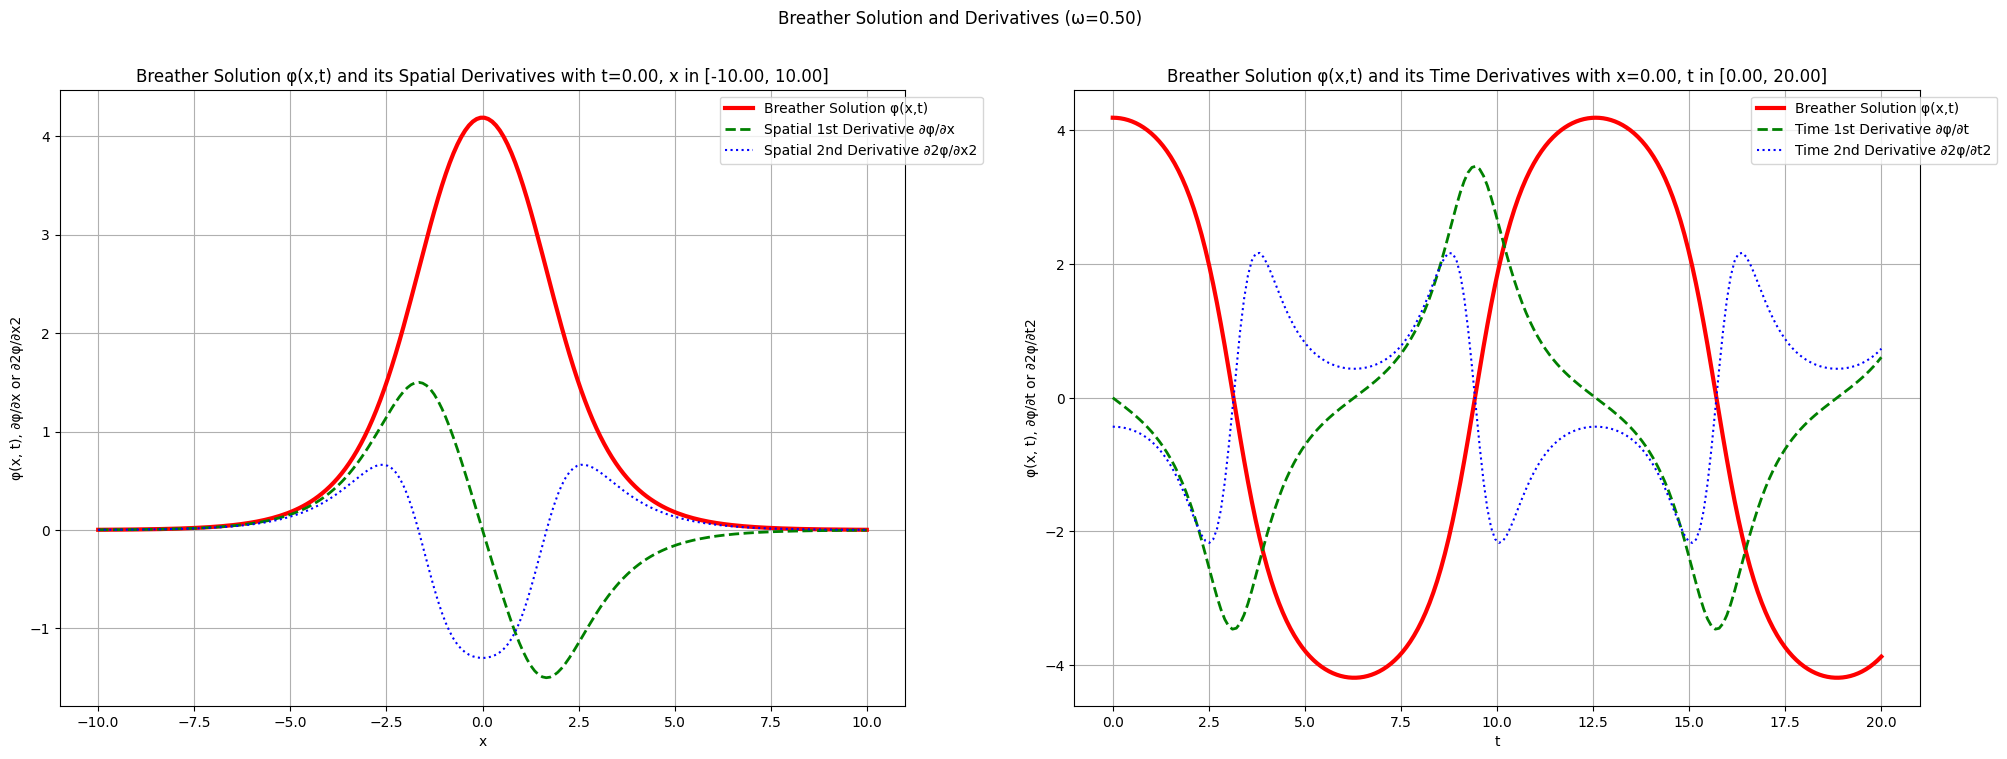

In [4]:
# TODO: Check that the sympy differentiation is correct! (compare with the question)

def plot_phi_and_spatial_derivatives_at_t0(
        axis, breather,
        x_values=np.linspace(start=-10.0, stop=10.0, num=200),
        t0=0.0
):
    axis.plot(
        x_values,
        breather.compute(x=x_values, t=t0),
        label=f'Breather Solution φ(x,t)', color='red', linewidth=3.0)
    axis.plot(
        x_values,
        breather.compute(x=x_values, t=t0, derivative_order=1, independent_variable='x'),
        '--',
        label=f'Spatial 1st Derivative ∂φ/∂x', color='green', linewidth=2.0)
    axis.plot(
        x_values,
        breather.compute(x=x_values, t=t0, derivative_order=2, independent_variable='x'),
        ':',
        label=f'Spatial 2nd Derivative ∂2φ/∂x2', color='blue', linewidth=1.5)
    axis.set(# ylim=(-4.3, 4.3),
        xlabel='x', ylabel=f'φ(x, t), ∂φ/∂x or ∂2φ/∂x2',
        title=f'Breather Solution φ(x,t) and its Spatial Derivatives with t={t0:.2f}, x in [{x_values[0]:.2f}, {x_values[-1]:.2f}]')
    axis.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
    axis.grid()


def plot_phi_and_time_derivatives_at_x0(
        axis, breather,
        x0=0.0,
        t_values=np.linspace(start=0.0, stop=20.0, num=200)
):
    axis.plot(
        t_values,
        breather.compute(x=x0, t=t_values),
        label=f'Breather Solution φ(x,t)', color='red', linewidth=3.0)
    axis.plot(
        t_values,
        breather.compute(x=x0, t=t_values, derivative_order=1, independent_variable='t'),
        '--',
        label=f'Time 1st Derivative ∂φ/∂t', color='green', linewidth=2.0)
    axis.plot(
        t_values,
        breather.compute(x=x0, t=t_values, derivative_order=2, independent_variable='t'),
        ':',
        label=f'Time 2nd Derivative ∂2φ/∂t2', color='blue', linewidth=1.5)
    axis.set(# ylim=(-4.3, 4.3),
        xlabel='t', ylabel=f'φ(x, t), ∂φ/∂t or ∂2φ/∂t2',
        title=f'Breather Solution φ(x,t) and its Time Derivatives with x={x0:.2f}, t in [{t_values[0]:.2f}, {t_values[-1]:.2f}]')
    axis.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))
    axis.grid()



def plot_breather_demo(
    x_values=np.linspace(start=-10.0, stop=10.0, num=200),
    t_values=np.linspace(start=0.0, stop=20.0, num=200),
    x0=0.0, t0=0.0,
    omega=0.5
):
    breather = BreatherSolutionCalculator.get_singleton(omega=omega)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(w=24, h=8)

    # Plot the spatial derivatives and φ(x,t) at different t values.
    plot_phi_and_spatial_derivatives_at_t0(axis=fig.axes[0], breather=breather, x_values=x_values, t0=t0)
    # Plot the time derivatives and φ(x,t) at different x values.
    plot_phi_and_time_derivatives_at_x0(axis=fig.axes[1], breather=breather, x0=x0, t_values=t_values)

    fig.suptitle(f'Breather Solution and Derivatives (ω={omega:.2f})')
    # fig.tight_layout()
    plt.show();


plot_breather_demo()

We can make a simple test to see if the code works. Substituting $x = 0$ and $t = 0$ into equations $(3)$ and $(4)$, we can see that $\frac{\delta \phi (x, t)}{\delta x} = 0$ and $\frac{\delta \phi (x, t)}{\delta t} = 0$, while equation $(2)$ gives $\phi (x, t) = 4.188790204786391$ (this value will also appear in <b>Q1b</b>). Let's see if the code returns the same values.

In [5]:
def test_breather_solution_simple(x=0.0, t=0.0):

    breather = BreatherSolutionCalculator.get_singleton(omega=0.5)

    solution_phi = breather.compute(x=x, t=t)
    spatial_derivative_dphi_dx = breather.compute(x=x, t=t, derivative_order=1, independent_variable='x')
    time_derivative_dphi_dt = breather.compute(x=x, t=t, derivative_order=1, independent_variable='t')

    print(f'solution_phi = {solution_phi}')
    print(f'spatial_derivative_dphi_dx = {spatial_derivative_dphi_dx}')
    print(f'time_derivative_dphi_dt = {time_derivative_dphi_dt}')

    if x == 0.0 and t == 0.0:
        expected_phi = 4.188790204786391
        assert np.isclose(solution_phi, expected_phi), \
            f"Expected solution_phi to be {expected_phi}. Got {solution_phi}"
        expected_spatial_derivative_dphi_dx = 0.0
        assert np.isclose(spatial_derivative_dphi_dx, expected_spatial_derivative_dphi_dx), \
            f"Expected spatial_derivative_dphi_dx to be {expected_spatial_derivative_dphi_dx}. Got {spatial_derivative_dphi_dx}"
        expected_time_derivative_dphi_dt = 0.0
        assert np.isclose(time_derivative_dphi_dt, expected_time_derivative_dphi_dt), \
            f"Expected time_derivative_dphi_dt to be {expected_time_derivative_dphi_dt}. Got {time_derivative_dphi_dt}"


test_breather_solution_simple(x=0.0, t=0.0)

solution_phi = 4.188790204786394
spatial_derivative_dphi_dx = -0.0
time_derivative_dphi_dt = -0.0


The class seems to work as expected.

**Q1b**. The following data is given for the breather solution at 5 equally spaced points for $\omega=0.5$ and $t=0$: 

$(x, \phi) ~=~ \quad (-10,2.40187283\times 10^{-3}), \quad (-5,0.182273831), \quad (0, 4.18879020),  \quad (5,0.182273831), \quad (10,2.40187283\times 10^{-3})$

   Check that you can recover this data using your breather class methods implemented in Q1.

**Answer Q1b:**

In [6]:
def test_breather_solution_with_given_data():
    omega = 0.5
    t = 0.0
    five_equally_spaced_points = (
        (-10.0, 2.40187283 * 1e-3),
        (-5.0, 0.182273831),
        (0.0, 4.18879020),
        (5.0, 0.182273831),
        (10.0, 2.40187283 * 1e-3)
    )
    breather_solution_calculator = BreatherSolutionCalculator.get_singleton(omega=omega)
    for i_point, (x, phi) in enumerate(five_equally_spaced_points):
        phi_calculated = breather_solution_calculator.compute(x=x, t=t)
        print(f'x={x}, phi={phi_calculated}')
        assert abs(phi_calculated - phi) < 1e-8, \
            f"Breather solution fails at point {i_point} where x={x}, t={t}, omega={omega}. Expect phi={phi}, got {phi_calculated}."
    print(f"Test passed!")


test_breather_solution_with_given_data()

x=-10.0, phi=0.0024018728252964126
x=-5.0, phi=0.1822738312801753
x=0.0, phi=4.188790204786394
x=5.0, phi=0.1822738312801753
x=10.0, phi=0.0024018728252964126
Test passed!


**Q1c**. Fit the data using a Lagrange polynomial of the maximum possible order, showing explicitly how you construct the polynomial from first principles (you can use `sympy` functions to do the maths for you, or show your workings in full). Check your implementation using the `scipy.interpolate.lagrange` function and plot the resulting function, along with the data points. Comment on how well it fits the true breather solution.

**Answer Q1c:**

The general formula to construct a Lagrange polynomial is $P(x) = \sum_{i=0}^n y_i \prod_{j=0, j \neq i}^n \frac{x-x_j}{x_i-x_j}$ where $x_i$ are the data points and $y_i$ are the function values at those points.

In the example from <b>Q1b</b>, we have $5$ data points, so we have a $4^{th}$ order polynomial. We can write it explicitly as:

$$

P(x) =  y_0 \frac{(x-x_1)(x-x_2)(x-x_3)(x-x_4)}{(x_0-x_1)(x_0-x_2)(x_0-x_3)(x_0-x_4)} \\
        + y_1 \frac{(x-x_0)(x-x_2)(x-x_3)(x-x_4)}{(x_1-x_0)(x_1-x_2)(x_1-x_3)(x_1-x_4)} \\
        + y_2 \frac{(x-x_0)(x-x_1)(x-x_3)(x-x_4)}{(x_2-x_0)(x_2-x_1)(x_2-x_3)(x_2-x_4)} \\
        + y_3 \frac{(x-x_0)(x-x_1)(x-x_2)(x-x_4)}{(x_3-x_0)(x_3-x_1)(x_3-x_2)(x_3-x_4)} \\
        + y_4 \frac{(x-x_0)(x-x_1)(x-x_2)(x-x_3)}{(x_4-x_0)(x_4-x_1)(x_4-x_2)(x_4-x_3)}

$$

Below is an explicit implementation of the $4^{th}$ order Lagrange polynomial using `sympy`.

In [7]:
def construct_sympy_lagrange_polynomial_of_order_5_explicitly():
    x, x0, x1, x2, x3, x4, y0, y1, y2, y3, y4 = sympy.symbols('x x0 x1 x2 x3 x4 y0 y1 y2 y3 y4')
    lagrange_polynomial = (
      y0  *  ( (x-x1)*(x-x2)*(x-x3)*(x-x4) / ((x0-x1)*(x0-x2)*(x0-x3)*(x0-x4)) )  +
      y1  *  ( (x-x0)*(x-x2)*(x-x3)*(x-x4) / ((x1-x0)*(x1-x2)*(x1-x3)*(x1-x4)) )  +
      y2  *  ( (x-x0)*(x-x1)*(x-x3)*(x-x4) / ((x2-x0)*(x2-x1)*(x2-x3)*(x2-x4)) )  +
      y3  *  ( (x-x0)*(x-x1)*(x-x2)*(x-x4) / ((x3-x0)*(x3-x1)*(x3-x2)*(x3-x4)) )  +
      y4  *  ( (x-x0)*(x-x1)*(x-x2)*(x-x3) / ((x4-x0)*(x4-x1)*(x4-x2)*(x4-x3)) )
    )
    return lagrange_polynomial, (x0, x1, x2, x3, x4), (y0, y1, y2, y3, y4)

However, instead of implementing explicitly, I will use a general implementation to construct a Lagrange polynomial of any order.

We can construct the polynomial using `x0`, `x1`, ... Alternatively, assuming that the data points are equally spaced, we only need to know `dx` construct the polynomial using `dx` where `dx` is the spacing between the data points.

For example, the output for a $2^{nd}$ order Lagrange polynomial will look as follows:

```python
-y₀⋅(x - x₁)⋅(dx - x + x₁) + 2⋅y₁⋅(dx - x + x₁)⋅(dx + x - x₁) + y₂⋅(x - x₁)⋅(dx + x - x₁)
─────────────────────────────────────────────────────────────────────────────────────────
                                              2                               
                                          2⋅dx                                

```


In [8]:
class Lagrange:
    def __init__(self, polynomial_order=1):
        assert isinstance(polynomial_order, int), f"Degree of Lagrange polynomial must be an integer. Got {self.polynomial_order} which is a {type(self.polynomial_order)}."
        MIN_POLYNOMIAL_ORDER = 0
        assert polynomial_order >= MIN_POLYNOMIAL_ORDER, f"Degree of Lagrange polynomial must be at least {MIN_POLYNOMIAL_ORDER}. Got {self.polynomial_order}"

        n_points = polynomial_order + 1
        central_index = n_points // 2

        # Define the symbols
        x, dx = sympy.symbols('x dx')
        x_central = sympy.symbols(f'x{central_index}')
        x_data = [x_central + (i - central_index) * dx for i in range(n_points)]
        y_data = sympy.symbols(f'y0:{n_points}')

        self.polynomial_order, self.n_points, self.central_index = polynomial_order, n_points, central_index
        self.x, self.dx, self.x_central, self.x_data, self.y_data = x, dx, x_central, x_data, y_data

    @staticmethod
    @cache
    def get_singleton(polynomial_order=1):
        """
        Return a singleton instance of the LagrangePolynomial class
        for each value of polynomial order."""
        return Lagrange(polynomial_order=polynomial_order)

    @cache
    def get_lagrange_polynomial(self):
        return Lagrange.construct_sympy_lagrange_polynomial(x=self.x, x_data=self.x_data, y_data=self.y_data)

    def fit(self, x_values, y_values):
        assert self.n_points == len(x_values), f"Expected length of x_data: {self.n_points}. Got {len(y_values)}."
        assert self.n_points == len(y_values), f"Expected length of y_data: {self.n_points}. Got {len(y_values)}."
        dx_value = x_values[1] - x_values[0]
        x_central_value = x_values[self.central_index]

        P = self.get_lagrange_polynomial()
        P = P.subs([(self.dx, dx_value)])
        P = P.subs([(self.x_central, x_central_value)])
        P = P.subs([(self.y_data[i], y_values[i]) for i in range(self.n_points)])
        P = sympy.simplify(P)
        self.fitted_sympy_polynomial = P
        numpy_function = sympy.lambdify(self.x, P, 'numpy')
        return numpy_function

    @staticmethod
    def construct_sympy_lagrange_polynomial(x, x_data, y_data):
        n_points = len(x_data)
        assert len(y_data) == n_points, f"Number of x and y data points must be the same. Got {n_points} x data points and {len(y_data)} y data points."
        lagrange_polynomial = 0
        # Apply the general formula for the Lagrange polynomial
        for i in range(n_points):
            L_i = 1
            for j in range(n_points):
                if i != j:
                    L_i *= (x - x_data[j]) / (x_data[i] - x_data[j])
            lagrange_polynomial += y_data[i] * L_i

        lagrange_polynomial = sympy.simplify(lagrange_polynomial)
        return lagrange_polynomial



def test_construct_sympy_lagrange_polynomial_using_dx(polynomial_order=2):
    lagrange = Lagrange.get_singleton(polynomial_order=polynomial_order)
    P = lagrange.get_lagrange_polynomial()
    P_simplified = sympy.simplify(P)
    sympy.pprint(P_simplified)
    print()

    if polynomial_order == 2:
        '''
        y₀⋅(x - x₁)⋅(x - x₂)   y₁⋅(x - x₀)⋅(x - x₂)    y₂⋅(x - x₀)⋅(x - x₁)
        ──────────────────── + ──────────────────── + ─────────────────────
        (x₀ - x₁)⋅(x₀ - x₂)    (-x₀ + x₁)⋅(x₁ - x₂)   (-x₀ + x₂)⋅(-x₁ + x₂)
        '''
        x, x1, dx, y0, y1, y2 = sympy.symbols('x x1 dx y0 y1 y2')
        expected_P_degree_2 = (
            (-y0*(x - x1)*(dx - x + x1) + 2*y1*(dx - x + x1)*(dx + x - x1) + y2*(x - x1)*(dx + x - x1))/(2*dx**2)
        )
        assert P.equals(expected_P_degree_2), \
            f"Constructing Lagrange polynomial of order {polynomial_order} failed.\n\n Expect :  {expected_P_degree_2}\n\n   Got  :  {P_simplified}."



test_construct_sympy_lagrange_polynomial_using_dx()
# test_construct_sympy_lagrange_polynomial_using_dx(degree=3)

-y₀⋅(x - x₁)⋅(dx - x + x₁) + 2⋅y₁⋅(dx - x + x₁)⋅(dx + x - x₁) + y₂⋅(x - x₁)⋅(d
──────────────────────────────────────────────────────────────────────────────
                                              2                               
                                          2⋅dx                                

x + x - x₁)
───────────
           
           



Then we can fit the data using the Lagrange polynomial. For example, if we fit a Lagrange polynomial to the data $[(-1, 1), (0, 0), (1, 1)]$ we will get the polynomial $P(x) = x^2$.

In [9]:
def test_fit_the_data_using_lagrange_polynomial():
    x_data = (-1.0, 0.0, 1.0)
    y_data = (1.0, 0.0, 1.0)

    polynomial_order = len(x_data) - 1
    L = Lagrange.get_singleton(polynomial_order=polynomial_order)
    numpy_lagrange_polynomial = L.fit(x_values=x_data, y_values=y_data)

    print(f'Lagrange polynomial P(x) = {L.fitted_sympy_polynomial}')

    x_value_to_evaluate = 0.0
    y = numpy_lagrange_polynomial(x_value_to_evaluate)

    print(f'Evaluate P({x_value_to_evaluate}) = {y}')

    expected_y = 0.0
    assert abs(y - expected_y) < 1e-6, \
        f"Failed to fit the data using Lagrange polynomial. Expect y={expected_y}, got {y}."


test_fit_the_data_using_lagrange_polynomial()

Lagrange polynomial P(x) = x**2
Evaluate P(0.0) = 0.0


Now I will compare my implementation with `scipy.interpolate.lagrange` function by using both to fit the $5$ data points given in <b>Q1b</b> and plot the results, along with the data points.

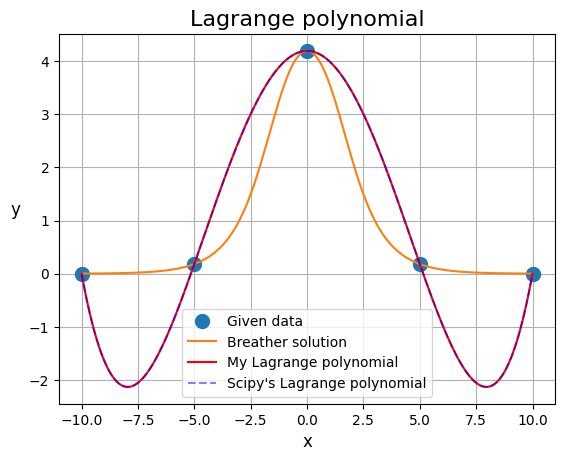

In [10]:
def compare_my_lagrange_polynomial_implementation_with_scipy():
    # The five equally spaced points given in the question
    five_equally_spaced_points = [
        [-10.0, 2.40187283 * 1e-3],
        [-5.0, 0.182273831],
        [0.0, 4.18879020],
        [5.0, 0.182273831],
        [10.0, 2.40187283 * 1e-3]
    ]

    # Separate x and y for constructing Lagrange polynomial
    x_data = [x for x, _ in five_equally_spaced_points]
    y_data = [y for _, y in five_equally_spaced_points]

    fig, ax = plt.subplots(nrows=1, ncols=1)
    # fig.set_size_inches(w=8, h=6)
    axis = fig.axes[0]
    axis.plot(x_data, y_data, 'o', markersize=10, label="Given data")

    x_lagrange = np.linspace(-10.0, 10.0, 1000)

    # Plot the true breather solution
    breather = BreatherSolutionCalculator.get_singleton(omega=0.5)
    axis.plot(x_lagrange, breather.compute(x=x_lagrange, t=0.0),
        label="Breather solution"
    )

    # Plot the interpolation using my Lagrange polynomial implementation
    L = Lagrange.get_singleton(polynomial_order=len(x_data) - 1)
    numpy_lagrange_polynomial = L.fit(x_values=x_data, y_values=y_data)
    axis.plot(x_lagrange, numpy_lagrange_polynomial(x_lagrange), linestyle='-',
        label="My Lagrange polynomial",
        color='red',
    )

    # Plot the interpolation using scipy's Lagrange polynomial implementation
    scipy_lagrange = scipy.interpolate.lagrange(x_data, y_data)
    axis.plot(
        x_lagrange,
        scipy_lagrange(x_lagrange),
        linestyle='--',
        label="Scipy's Lagrange polynomial",
        color='blue',
        alpha=0.5
    )
    axis.set_xlabel("x", size=12)
    axis.set_ylabel("y", size=12, rotation=0, labelpad=10)
    axis.set_title("Lagrange polynomial", size=16)
    axis.legend()
    axis.grid()
    plt.show();


    my_lagrange = L.fitted_sympy_polynomial
    my_lagrange = sympy.simplify(my_lagrange)  # Simplify the Lagrange polynomial to get coefficients of x^0, x^1, x^2, etc.
    x_symbol = sympy.symbols('x')
    # Get my polynomial's coefficients. Note: the order of coefficients in `sympy` starts with the lowest power of x.
    my_lagrange_coefficients = [my_lagrange.coeff(x_symbol, i) for i in range(len(x_data))]
    my_lagrange_coefficients.reverse() # Reverse the order of coefficients to match the natural reading order (from highest power of x to lowest)
    # Get scipy's polynomial's coefficients. Note: the order of coefficients in `scipy` starts with the highest power of x.
    scipy_lagrange_coefficients = scipy_lagrange.coefficients
    # Check that my results matches with scipy's
    for (i_my_lagrange_coefficient, my_lagrange_coefficient), \
        (i_scipy_lagrange_coefficient, scipy_lagrange_coefficient) \
            in zip(enumerate(my_lagrange_coefficients), enumerate(scipy_lagrange_coefficients)):
        assert abs(my_lagrange_coefficient - scipy_lagrange_coefficient) < 1e-6, \
            f"Failed to fit the data using Lagrange polynomial. Expect coefficient {i_my_lagrange_coefficient} to be {scipy_lagrange_coefficient}, got {my_lagrange_coefficient}."


compare_my_lagrange_polynomial_implementation_with_scipy()

<!-- TODO: Write about the result and how it compares to the true breather solution. Comment on how well it fits the true breather solution. -->

The result of my implementation is the same as the one produced by `scipy`. However, the Lagrange polynomial does not fit the Breather solution very well. This is partly because we are using too few points, and also because of the Runge’s phenomenon.
<!-- See Slide 10/43 of Week 9. -->

**Q1d**. Now use your breather class to construct another set of data with 10 equally spaced points in the interval $x = [-15, 15]$, find the appropriate Lagrange fitting polynomial and plot it. Increase the number of points to 12 - does the solution improve? Comment on your results.

*(NOTE: for this question you can directly use `scipy.interpolate.lagrange` to construct the Lagrange polynomial for you)*.

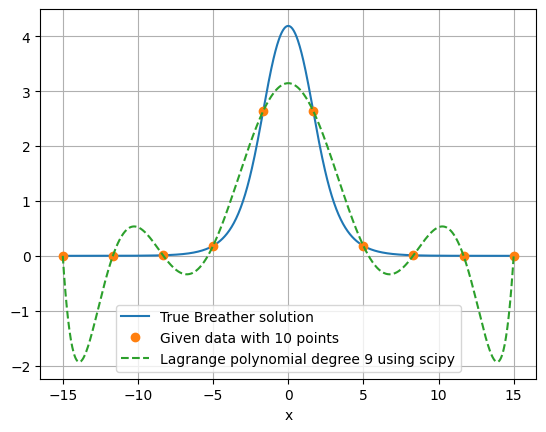

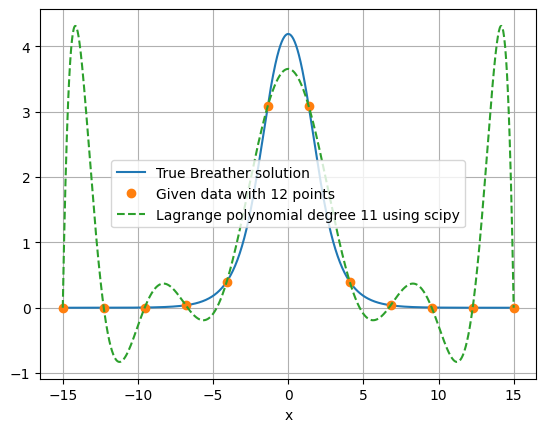

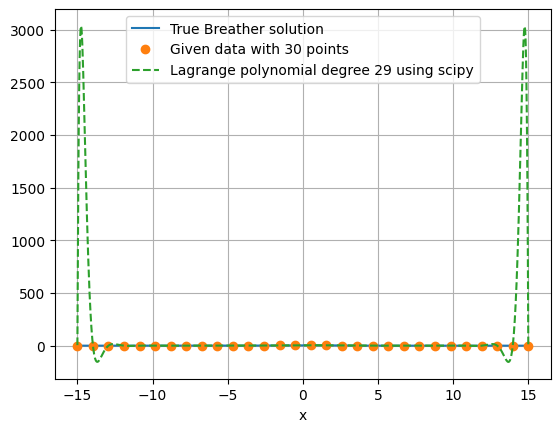

In [11]:
def try_Q1d(n_points):
  x_first, x_last = -15.0, 15.0

  # Construct a set of data using breather class
  breather = BreatherSolutionCalculator.get_singleton(omega=0.5)
  fig, ax = plt.subplots(nrows=1, ncols=1)
  # fig.set_size_inches(w=8, h=6)
  axis = fig.axes[0]

  x_true = np.linspace(start=x_first, stop=x_last, num=1000)
  y_true = breather.compute(x_true, t=0.0)
  axis.plot(x_true, y_true, label='True Breather solution')

  x_given = np.linspace(start=x_first, stop=x_last, num=n_points)
  y_given = breather.compute(x_given, t=0.0)
  axis.plot(x_given, y_given, 'o', label=f'Given data with {n_points} points')

  polynomial_order = n_points - 1
  x_interpolate = np.linspace(start=x_first, stop=x_last, num=1000)

  lagrange_polynomial = scipy.interpolate.lagrange(x_given, y_given)
  y_interpolate = lagrange_polynomial(x_interpolate)

  # # My implementation produces the same result as scipy's but it is TOO SLOW!
  # L = Lagrange.get_singleton(polynomial_order=polynomial_order)
  # numpy_lagrange_polynomial = L.fit(x_values=x_given, y_values=y_given)
  # lagrange_polynomial = L.fitted_sympy_polynomial
  # numpy_lagrange_polynomial = sympy.lambdify(L.x, lagrange_polynomial, 'numpy')
  # y_interpolate = numpy_lagrange_polynomial(x_interpolate)

  # Plot the lagrange solution
  axis.plot(x_interpolate, y_interpolate, linestyle='--',
    label=f'Lagrange polynomial degree {polynomial_order} using scipy'
  )

  axis.set_xlabel("x")
  axis.grid()
  axis.legend()
  plt.show();



try_Q1d(n_points=10)

try_Q1d(n_points=12)

try_Q1d(n_points=30)

More points improved the ﬁt at the interior, but with regular intervals it tends to lead to spurious oscillations at the edges of the interval. This is known as Runge’s phenomenon.
<!-- See Slide 10/43 of Week 9. -->

**Q1e**. Find the 12 points located at the Gauss-Lobato nodes in the interval $x = [-15, 15]$ and again fit and plot a Lagrange polynomial at these points (using `scipy.interpolate.lagrange`). Does using more points improve the quality of fit? Roughly how many points are needed to fit the true breather solution well (no difference seen by eye)?

12 points are not enough to fit the breather solution.


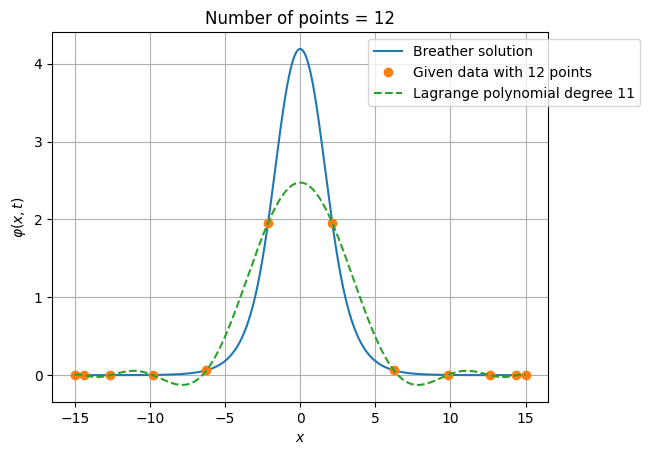

Roughly 30 points are enough to fit the true breather solution well (no difference when seen by the naked eye).


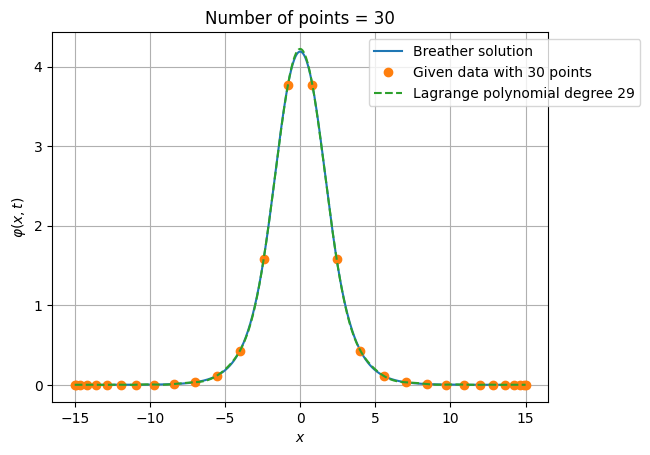

Using too many points will lead to numerical instability!


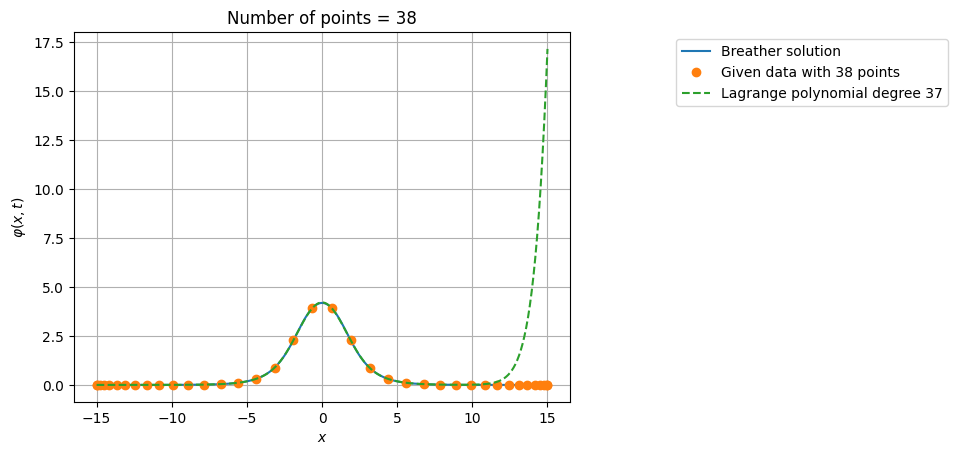

In [12]:
def try_Q1e(n_points):
  N = n_points - 1  # We need n_points points. My code is currently making N+1 points
  a = -15.0
  b = 15.0

  # Find the Gauss Lobato nodes
  indices = np.arange(N+1)
  u_points = np.cos(np.pi * indices / N)
  x_data = (b - a)/2.0 * u_points + (a + b)/2.0

  breather = BreatherSolutionCalculator.get_singleton(omega=0.5)
  y_data = breather.compute(x=x_data, t=0.0)

  x_true_data = np.linspace(start=a, stop=b, num=1000)
  y_true_data = breather.compute(x_true_data, t=0.0)

  # Plot x_data and y_data
  fig, ax = plt.subplots(nrows=1, ncols=1)
  # fig.set_size_inches(w=8, h=6)
  axis = fig.axes[0]

  axis.plot(x_true_data, y_true_data,
    label='Breather solution')

  axis.plot(x_data, y_data, 'o',
    label=f'Given data with {n_points} points')

  lagrange_polynomial = scipy.interpolate.lagrange(x_data, y_data)
  x_lagrange = np.linspace(start=a, stop=b, num=1000)
  degree = lagrange_polynomial.order
  # Plot the lagrange solution
  axis.plot(
    x_lagrange,
    lagrange_polynomial(x_lagrange),
    linestyle='--',
    label=f'Lagrange polynomial degree {degree}'
  )

  axis.set_xlabel(r"$x$")
  axis.set_ylabel(r"$\varphi(x, t)$")
  axis.set_title(f'Number of points = {n_points}')

  axis.grid()
  axis.legend(bbox_to_anchor=(1.2, 1.0))
  plt.show();



print(f"12 points are not enough to fit the breather solution.")
try_Q1e(n_points=12)


print(f"Roughly 30 points are enough to fit the true breather solution well (no difference when seen by the naked eye).")
try_Q1e(n_points=30)


print(f"Using too many points will lead to numerical instability!")
try_Q1e(n_points=38)

<!-- <b>Working Q1e:</b>
TODO: More commenting on the results!
Does more points improve the quality of fit? Roughly how many points are needed to fit the true breather solution well (no difference seen by eye)? -->
Roughly $30$ points are enough to fit the true breather solution well (no difference when seen by the naked eye). However, as we can see in the example above with $38$ points, too many points will not improve the fit due to accumulated numerical errors.

<!-- <b>Optional Q1e:</b>
NOTE: A lot more points will make it blow up! How can I show?

- Just a tip for final final stuff for able to make better comments:
  - Make videos and post on youtube and link when click on static plots
  - Use some free/paid web hosting platform and make interactive web apps with plotly or bokeh or something and link to them from the notebook. DON'T embed them in the notebook as it requires installation, longer code...
    - Can put code open-source on github and link to it from the notebook -->

#### 2.2.2 Q2 Integration (10 marks for 2 parts (a)-(b)):

The potential energy of the breather solution at some time $t$ is given by the value of 

$ E(t) = \int^\infty_{-\infty} (1 - \cos(\phi(x,t)) dx $
    

**Q2a**. Estimate this integral using 11 equally spaced points in the interval $x = [-15, 15]$ and Simpsons composite 3 point rule 

_NOTE: you do not need to implement the Simpson's composite rule, you can directly use the python function `scipy.integrate.simpson`_.

<b>Answer Q2a.</b>

<!-- We estimate the integral $ E(t) = \int^\infty_{-\infty} (1 - \cos(\phi(x,t)) dx $ using 11 equally spaced points in the interval $x = [-15, 15]$ and Simpsons composite 3 point rule. -->

<!-- ```python
def test_week_8_lab():
  def get_y_test_function(a_x_points) :
    y_test = np.exp(-a_x_points*a_x_points) + np.sin(a_x_points)
    return y_test

  # function to get integral using simpson's rule
  a = -5
  b = 5
  N = 11
  # N = 12 # See if our implementation works for even number of points
  # N = 13


  # Implement your own version of the composite trapezoid rule
  def get_test_integral_simpson(a_num_points) :
      # NOTE: This implementation will not work for even number of points!
      x_integration = np.linspace(a , b,  a_num_points)
      y_integration = get_y_test_function(x_integration)
      dx = (b - a) / (a_num_points - 1)
      assert a_num_points > 2, 'insufficient points for simpsons rule'
      integral = (dx/3.0) * (y_integration[0] + 2*sum(y_integration[2:a_num_points-2:2]) \
              + 4*sum(y_integration[1:a_num_points-1:2]) + y_integration[a_num_points-1])
      return integral

  integral = get_test_integral_simpson(N)

  # Check using the python function
  x_integration = np.linspace(a , b,  N)
  y_integration = get_y_test_function(x_integration)
  integral_scipy = scipy.integrate.simpson(y_integration,x_integration)

  print("The integral with ", N, " points is ", integral, integral_scipy)

test_week_8_lab()
``` -->

In [13]:
def estimate_potential_energy_of_breather_solution(x_first=-15.0, x_last=15.0, n_points=11, t=0.0):
    assert x_first < x_last, f"Start of interval must be less than end of interval. Got {x_first} and {x_last}"
    x_integration = np.linspace(start=x_first, stop=x_last, num=n_points)

    breather = BreatherSolutionCalculator.get_singleton(omega=0.5)
    phi = breather.compute(x=x_integration, t=t)

    y_integration = 1.0 - np.cos(phi)
    potential_energy_estimation_using_simpson = scipy.integrate.simpson(
        y=y_integration,
        x=x_integration
    )
    print(f'Using {n_points} equally spaced points in the interval x = [{x_first}, {x_first}] and Simpsons composite 3 point rule.')
    print(f'Estimation of potential energy using Simpson\'s: {potential_energy_estimation_using_simpson}')

    potential_energy_estimation_using_quad = scipy.integrate.quad(
        lambda x: 1.0 - np.cos(breather.compute(x=x, t=t)),
        a=x_first,
        b=x_last
    )[0]

    print(f'Estimation of potential energy using scipy.integrate.quad: {potential_energy_estimation_using_quad}')


# 11 equally spaced points in the interval [-15, 15]
estimate_potential_energy_of_breather_solution(
    x_first=-15.0,
    x_last=15.0,
    n_points=11,
    t=0.0
)

Using 11 equally spaced points in the interval x = [-15.0, -15.0] and Simpsons composite 3 point rule.
Estimation of potential energy using Simpson's: 7.875359297017485
Estimation of potential energy using scipy.integrate.quad: 9.562119023547792


Using the Simpson's composite rule, we get an estimate of around $7.875359297017485$. However, using `scipy.integrate.quad` we get $9.562119023547792$. This is because $11$ points are not enough. In <b>Q2b</b> we will see that the error is reduced when we increase the number of points.

**Q2b**. Calculate the integral with the number of points $N = [3,4,5,6,7,8,10,14,18,256]$. Make a plot to confirm that the value converges (roughly) at the expected rate given the error of this method.

<b>Answer Q2b.</b>
<!-- <b>Hint Q2b:</b>
Plot of convergence rate from <b>Week 8</b> slide 40/45
<span style="color:red">
</span> -->

Estimated potential energy using ...
    3 points: 30.000000004999947
    4 points: 0.35892855882496655
    5 points: 7.504381520990591
    6 points: 5.555490252829862
    7 points: 10.110478016881428
    8 points: 11.717863388239909
    10 points: 12.612237349986023
    14 points: 10.163323421206792
    18 points: 9.395783980432267
    256 points: 9.562119023548012
Best estimate of potential energy: 9.562119023548012


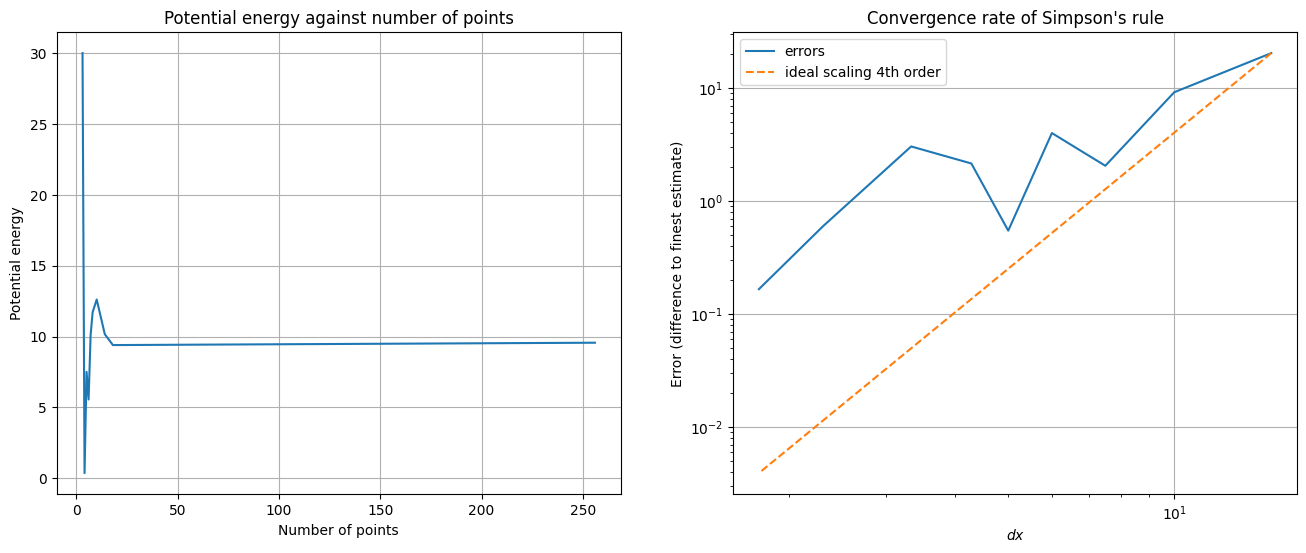

In [14]:
def estimate_potential_energies(num_points_vector=[3,4,5,6,7,8,10,14,18,256]):
    potential_energies = []
    breather = BreatherSolutionCalculator.get_singleton(omega=0.5) # default omega value

    # NOTE: When the number of points is even, the implementation of Simpson's rule in scipy.integrate.simpson will
    #       adjust... according to the `even` parameter. Just something interesting to know.
    for number_of_points in num_points_vector:
        x_integration = np.linspace(start=-15.0, stop=15.0, num=number_of_points)
        phi = breather.compute(x=x_integration, t=0.0)
        y_integration = 1.0 - np.cos(phi)
        potential_energy = scipy.integrate.simpson(y=y_integration, x=x_integration)
        potential_energies.append(potential_energy)
    return potential_energies



def plot_potential_energy_estimates(axis, potential_energies, num_points_vector):
    axis.plot(num_points_vector, potential_energies,
    )
    axis.set_xlabel("Number of points")
    axis.set_ylabel("Potential energy")
    axis.set_title("Potential energy against number of points")
    axis.grid()



def plot_convergence_test(axis, integrals, h_steps, expected_order=4):
    size = len(integrals)
    errors = abs(integrals - integrals[size-1])
    axis.loglog(
        h_steps[0:size-1],
        errors[0:size-1],
        label='errors'
    )
    ideal_errors = errors[0] * (h_steps / h_steps[0])**expected_order
    axis.loglog(
        h_steps[0:size-1],
        ideal_errors[0:size-1],
        linestyle='--',
        label='ideal scaling 4th order'
    )
    axis.set_xlabel(r"$dx$")
    axis.set_ylabel("Error (difference to finest estimate)")
    axis.set_title("Convergence rate of Simpson's rule")
    axis.legend()
    axis.grid()



def answer_Q2b():
    a, b = -15.0, 15.0                              # Given in the question
    num_points_vector=[3,4,5,6,7,8,10,14,18,256]    # Given in the question

    potential_energies = estimate_potential_energies(num_points_vector)
    print(f'Estimated potential energy using ...')
    for i, num_points in enumerate(num_points_vector):
        print(f'    {num_points} points: {potential_energies[i]}')
    print(f'Best estimate of potential energy: {potential_energies[-1]}')

    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(w=16, h=6)
    plot_potential_energy_estimates(axis=ax[0], potential_energies=potential_energies, num_points_vector=num_points_vector)

    h_steps = np.zeros_like(potential_energies)
    for idx, num_points in enumerate(num_points_vector) :
        h_steps[idx] = (b-a)/(num_points-1)
    # Check the convergence is roughly 4th order
    plot_convergence_test(axis=ax[1], integrals=potential_energies, h_steps=h_steps, expected_order=4)
    plt.show();

answer_Q2b()

We can see that the values of potential energy estimates converge, i.e. the errors decrease as the number of points increases. We can also see that the errors decreases roughly in the $4^{th}$ order (although a bit slower), which is the expected rate of the Simpson 3 point method.

#### 2.2.3. Q3 Differentiation (22 marks for 2 parts (a)-(b)):

The code to generate the pseudospectral derivative matrices for the first and second derivatives of any function $f(x)$ for a grid containing $N$ points *at the Gauss Lobato points* in $x$ is given below for the standard interval $[-1,1]$, and verified on some example functions.

In [15]:
# Code provided for the derivative matrices at Gauss Lobato nodes for the interval [-1,1]
# (For use in part 2.2.3)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Code provided for the derivative matrices at Gauss Lobato nodes for the interval [-1,1]

def get_pseudospectral_first_derivative_matrix(N) :

    indices = np.arange(N+1)
    u_i = np.cos(np.pi * indices / N)
    c_i = np.ones_like(indices)
    c_i[0] = 2.0
    c_i[N] = 2.0

    D_matrix = np.zeros([N+1,N+1])

    for idx_i in indices :
        for idx_j in indices :
            if(idx_i == 0 and idx_j == 0) :
                D_matrix[idx_i,idx_j] = (2.0 * N * N + 1.0)/6.0

            elif (idx_i == N and idx_j == N) :
                D_matrix[idx_i,idx_j] = -(2.0 * N * N + 1.0)/6.0

            elif (idx_i == idx_j) :
                D_matrix[idx_i,idx_j] = - u_i[idx_i] / 2.0 / (1.0 - u_i[idx_i] * u_i[idx_i])

            else :
                D_matrix[idx_i,idx_j] = (c_i[idx_i] / c_i[idx_j] * (-1)**(idx_i+idx_j)
                                         / (u_i[idx_i] - u_i[idx_j]))
    return D_matrix

def get_pseudospectral_second_derivative_matrix(N) :

    indices = np.arange(N+1)
    u_i = np.cos(np.pi * indices / N)
    c_i = np.ones_like(indices)
    c_i[0] = 2.0
    c_i[N] = 2.0

    D2_matrix = np.zeros([N+1,N+1])

    for idx_i in indices :
        for idx_j in indices :
            if((idx_i == idx_j) and (idx_i == 0 or idx_i == N)) :
                D2_matrix[idx_i,idx_j] = (N ** 4.0 - 1.0) / 15.0

            elif ((idx_i == idx_j) and (idx_i != 0) and (idx_i != N)) :
                D2_matrix[idx_i,idx_j] = (- ((N*N - 1.0) * (1.0 - u_i[idx_i] * u_i[idx_i]) + 3.0)
                                             / (3.0 * (1.0 - u_i[idx_i] * u_i[idx_i]) ** 2.0))

            elif (idx_i == 0 and idx_j > 0) :
                D2_matrix[idx_i,idx_j] = ((2.0 / 3.0) * ((-1) ** idx_j) / c_i[idx_j]
                                          * ((2.0 * N * N + 1.0) * (1.0 - u_i[idx_j]) - 6.0)
                                          / (1.0 - u_i[idx_j]) / (1.0 - u_i[idx_j]))

            elif (idx_i == N and idx_j < N) :
                D2_matrix[idx_i,idx_j] = ((2.0 / 3.0) * ((-1) ** (N+idx_j)) / c_i[idx_j]
                                          * ((2.0 * N * N + 1.0) * (1.0 + u_i[idx_j]) - 6.0)
                                          / (1.0 + u_i[idx_j]) / (1.0 + u_i[idx_j]))

            else :
                D2_matrix[idx_i,idx_j] = (((-1) ** (idx_i+idx_j)) / c_i[idx_j]
                                            * (u_i[idx_i]*u_i[idx_i] + u_i[idx_i]*u_i[idx_j] - 2.0)
                                            / (1.0 - u_i[idx_i]*u_i[idx_i]) / (u_i[idx_i] - u_i[idx_j])
                                            / (u_i[idx_i] - u_i[idx_j]))

    return D2_matrix

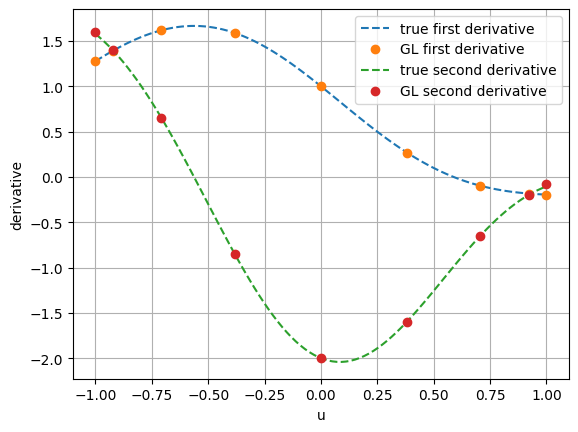

In [16]:
# Check this gives appropriate derivatives for a test function:
def check_pseudospectral_derivative_matrices() :
    N = 8
    indices = np.arange(N+1)
    u = np.cos(np.pi * indices / N)
    phi_test = np.exp(-u*u) + np.sin(u)
    D = get_pseudospectral_first_derivative_matrix(N)
    Dphi_approx = np.dot(D, phi_test)
    D2 = get_pseudospectral_second_derivative_matrix(N)
    D2phi_approx = np.dot(D2, phi_test)

    u_true = np.linspace(-1,1,100)
    Dphi_true = - 2.0 * u_true * np.exp(-u_true*u_true) + np.cos(u_true)
    D2phi_true = (4.0 * u_true ** 2.0 - 2.0) * np.exp(-u_true*u_true) - np.sin(u_true)

    plt.plot(u_true, Dphi_true, '--', label="true first derivative")
    plt.plot(u, Dphi_approx, 'o', label="GL first derivative")
    plt.plot(u_true, D2phi_true, '--', label="true second derivative")
    plt.plot(u, D2phi_approx, 'o', label="GL second derivative")
    plt.xlabel("u")
    plt.ylabel("derivative")
    plt.legend()
    plt.grid();

check_pseudospectral_derivative_matrices()

**Q3a**. Use these matrices to plot the first derivatives versus $x$ at each point for the breather solution using $N=20$ points. What number of points is needed to fit the true derivative function to a good approximation (no difference between the points and the true solution can be seen by eye)?

_HINT: You will need to rescale the Gauss Lobato derivatives for the new interval $[a,b]$ from $[-1,1]$_

Let's write an utility function to get the Gauss Lobato nodes.

In [17]:
def get_gauss_lobatto_nodes(num_points, a=-1, b=1) :
    indices = np.arange(num_points)     # [0, num_points-1]
    num_sectors = num_points - 1
    fractions = indices / num_sectors   # [0, 1]     (fractions are evenly spaced)
    angles = fractions * np.pi          # [0, pi]    (angles are evenly spaced)
    x_points = np.cos(angles)           # [-1, 1]    (points are not evenly spaced)
    x_points += 1.0                     # [0, 2]     (translating)
    x_points /= 2.0                     # [0, 1]     (normalising)
    x_points *= (b - a)                 # [0, b - a] (scaling)
    x_points += a                       # [a, b]     (translating)
    return x_points

Let's define a function to compute and plot the first derivatives versus $x$ at each point for the breather solution and allow the user to specify the number of points. I will also plot the true derivative function for comparison.

In [18]:
def plot_first_derivative_of_breather_solution(num_points=20, x_first=-1.0, x_last=1.0):
    x_points = get_gauss_lobatto_nodes(num_points=num_points, a=x_first, b=x_last)
    assert len(x_points) == num_points, f"Expect {num_points} points, got {len(x_points)} points."

    breather_solution = BreatherSolutionCalculator.get_singleton(omega=0.5)
    Dphi_true = breather_solution.compute(x=x_points, t=0.0, derivative_order=1, independent_variable='x')

    num_sectors = num_points - 1
    D = get_pseudospectral_first_derivative_matrix(num_sectors)  # the matrix is (N+1) by (N+1)
    linear_scale = (1.0 - (-1.0)) / (x_last - x_first)
    phi = breather_solution.compute(x=x_points, t=0.0)
    Dphi_approx = linear_scale * np.dot(D, phi)

    fig, ax = plt.subplots(nrows=1, ncols=1)
    # fig.set_size_inches(w=8, h=6)
    axis = fig.axes[0]  # get the first and only subplot

    axis.plot(
        x_points,
        Dphi_true,
        '*',
        markersize=6.6,
        alpha=0.5,
        label=f"given data with {num_points} points"
    )

    x_true = np.linspace(start=x_first, stop=x_last, num=1000)
    axis.plot(
        x_true,
        breather_solution.compute(x=x_true, t=0.0, derivative_order=1, independent_variable='x'),
        linestyle='-',
        label="true first derivative"
    )


    axis.plot(
        x_points,
        Dphi_approx,
        'o',
        alpha=0.5,
        label="Gauss Lobatto first derivative"
    )
    axis.set_xlabel("x")
    axis.set_ylabel("first derivative")
    axis.set_title(f"First derivative of breather solution against x for $\omega = 0.5$ and number of points = {num_points}")
    axis.legend(loc='upper right', bbox_to_anchor=(1.38, 1.0))
    axis.grid()
    plt.show();

Let's $N=20$ points on the interval $[-1, 1]$.

20 points are good enough for this small interval [-1, 1]


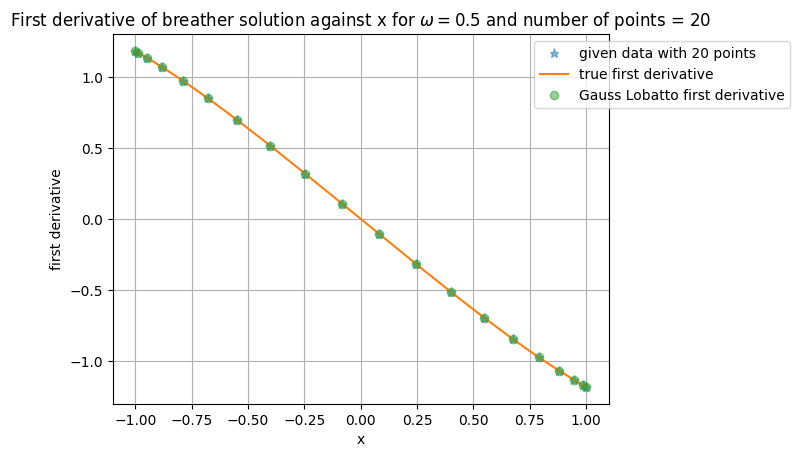

In [19]:
print(f"20 points are good enough for this small interval [-1, 1]")
plot_first_derivative_of_breather_solution(num_points=20, x_first=-1.0, x_last=1.0)

So $20$ points are enough to fit the true derivative function to a good approximation (no difference between the points and the true solution can be seen by eye) for the interval $[-1, 1]$. 

What if the interval gets larger? Let's try $N=20$ points on a much larger interval: $[-15, 15]$.

20 points are not good enough for this large interval [-15, 15]


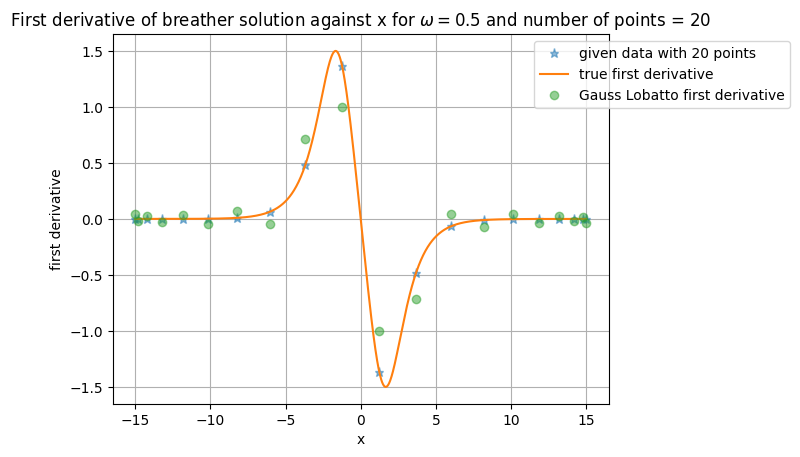

In [20]:
print(f"20 points are not good enough for this large interval [-15, 15]")
plot_first_derivative_of_breather_solution(num_points=20, x_first=-15.0, x_last=15.0)

We can see that $20$ points are no longer enough for the large interval $[-15, 15]$. Let's try to increase the number of points to $50$.

50 points are good enough for this large interval [-15, 15]


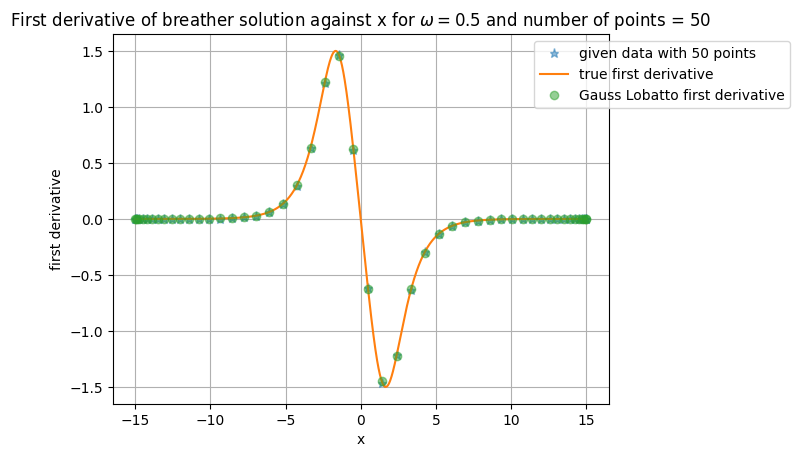

In [21]:
print(f"50 points are good enough for this large interval [-15, 15]")
plot_first_derivative_of_breather_solution(num_points=50, x_first=-15.0, x_last=15.0)

$50$ are enough for the large interval $[-15, 15]$. So the number of points needed to fit the true derivative function to a good approximation depends on the size of the interval.

It is also interesting to see if there are any numerical instability with this method as the number of points increases. Let's try $N=1000$ points on the interval $[-15, 15]$.

No numerical instability at 1000 points.


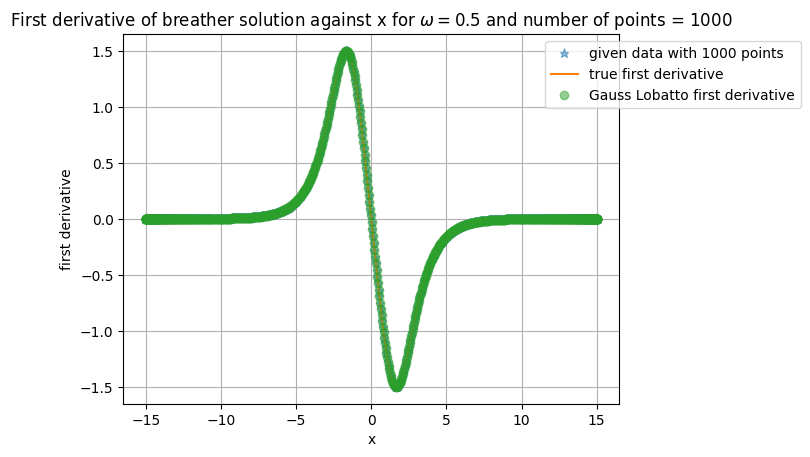

In [22]:
print(f"No numerical instability at 1000 points.")
plot_first_derivative_of_breather_solution(num_points=1000, x_first=-15.0, x_last=15.0)

So it seems that this method is stable for relatively large numbers of points.

In summary, for <b>Q3a</b>:

The number of points needed to fit the true derivative function to a good approximation is $20$ for the interval $[-1, 1]$, but increasing the interval will increase the number of points needed (for example, for the interval $[-15, 15]$ we will need roughly $50$ points). 
In general, the more points we use, the better the approximation becomes. Additionally, there seems to be no numerical instability issues at relatively large numbers of points (for example, $1000$ points).

<!-- There is some difference between the points and the true solution for $N=20$ points, but it is not very large for $N=50$ points. -->

<!-- <span style="color:red"> -->
<!-- </span> -->

**Q3b**. Write down the form of the <b>second</b> order <u>accurate</u> <b>finite difference</b> stencils for the <b>1st and 2nd derivatives</b> in $x$, using a fixed grid spacing $h$. Explain (in words) how many points you need to include in each stencil, and how the coefficients can be found using Lagrange polynomials. Create the derivative matrix for a grid in $x$ containing $N$ points. Check them on the test functions and the breather solution in the same way as has been done for the pseudospectral derivative matrices above, and conclude what number of points is required for the derivative estimates at each point to match their true values to a good approximation by eye.

_HINT: Remember to use one sided derivatives at the ends of the matrix!_

<b>Breakdown Q3b:</b>

- 1. Write down the form of the <u>second order accurate</u> <b>finite difference</b> stencils for the <b>1st and 2nd derivatives</b> in $x$, using a fixed grid spacing $h$. 

- 2. Explain (in words) 
  - how many points you need to include in each stencil, and 
  - how the coefficients can be found using Lagrange polynomials. 
  
- 3. Create the derivative matrix for a grid in $x$ containing $N$ points. 

- 4. Check them on the test functions and the breather solution in the same way as has been done for the pseudospectral derivative matrices above, and 

- 5. conclude what number of points is required for the derivative estimates at each point to match their true values to a good approximation by eye.

- Remember to use one sided derivatives at the ends of the matrix!



<!-- <span style="color:red"> -->
<b>Answer to Q3b:</b>


<!-- <b>Hint Q3b:</b> Slide 28/43 from <b>Week 9</b> for the Finite Derivative Matrix
<span style="color:red">
</span> -->


<!-- For example,  -->

<!-- The second order accurate finite difference stencils for the $1^{st}$ and $2^{nd}$ derivatives in $x$, using a fixed grid spacing $h$, are as follows: -->


  <!-- - Derivative (order 1) stencil degree 1 is 
  $$\frac{-y_0 + y_1}{dx}$$ 
  So the coefficients are $[-1, 1]$.
  
  - Derivative (order 1) stencil degree 2 is 
  $$\frac{-y_0 + y_2}{2 dx}$$ 
  So the coefficients are $[\frac{-1}{2}, 0, \frac{1}{2}]$. -->
  
Using the Finite Difference Coefficients Calculator provided by Cameron Taylor at [https://web.media.mit.edu/~crtaylor/calculator.html](https://web.media.mit.edu/~crtaylor/calculator.html), we can find the coefficients for the finite difference stencils.
  
The second order accurate stencil for $1^{st}$ derivative in $x$ is $\frac{-f(x-h) + f(x+h)}{2h}$. 
The coefficients are $[-\frac{1}{2h}, 0, \frac{1}{2h}]$.
  
The second order accurate stencil for $2^{nd}$ derivative in $x$ is $\frac{f(x-h) - 2 f(x) + f(x+h)}{h^2}$. 
The coefficients are $[\frac{1}{h^2}, -\frac{2}{h^2}, \frac{1}{h^2}]$.
  
Since the stencils are second order accurate, the number of points we need to include in each stencil is $3$.


<!-- To find the coefficients of a $2N$ order accurate finite difference stencil for the $M$ order derivative in $x$ ($\frac{\delta^{M}f(x)}{\delta x^{M}}$) using Lagrange polynomials, we can do as follows.

First we construct the $2N$ degree Lagrange polynomial using $2N + 1$ equally spaced points $\{(x-Nh, f(x - Nh)), ..., (x, f(x)), ..., (x+Nh, f(x + Nh))\}$ where $h$ is the fixed grid spacing. 

Then we take the $M^{th}$ derivative of the Lagrange polynomial and simplify the expression. 

The coefficients of $\frac{f(x - Nh)}{h^{M}}, ..., \frac{f(x)}{h^{M}}, ..., \frac{f(x + Nh)}{h^{M}}$ are the coefficients of the finite difference stencil. -->


To find the coefficients of a second order accurate finite difference stencil of the $d^{th}$ derivative in $x$ (i.e. $\frac{\delta^{d}f(x)}{\delta x^{d}}$) using Lagrange polynomials, we can do as follows.

First we construct the second order Lagrange polynomial using $3$ equally spaced points $\{(x-h, f(x-h)), (x, f(x)), (x+h, f(x+h))\}$ where $h$ is the fixed grid spacing. 

Then we take the $d^{th}$ derivative in $x$ of the Lagrange polynomial and simplify the expression.

The coefficients of $f(x-h)$, $f(x)$ and $f(x+h)$ are the coefficients of the finite difference stencil.



<!-- Example from slide 18 of Week 9
--------------------------------------------------------
Derivative (order 1) stencil degree 2 is
-y₀ + y₂
────────
  2⋅dx  

type(n_order_derivative_stencil) = <class 'sympy.core.mul.Mul'>
type(poly) = <class 'sympy.polys.polytools.Poly'>
Coefficients for derivative (order 1) stencil degree 2 with dx=0.5 are [-1.00000000000000, 0, 1.00000000000000]
Coefficients are as expected!



Example from slide 27 of Week 9
--------------------------------------------------------
Derivative (order 2) stencil degree 2 is
y₀ - 2⋅y₁ + y₂
──────────────
       2      
     dx       

type(n_order_derivative_stencil) = <class 'sympy.core.mul.Mul'>
type(poly) = <class 'sympy.polys.polytools.Poly'>
Coefficients for derivative (order 2) stencil degree 2 with dx=0.5 are [4.00000000000000, -8.00000000000000, 4.00000000000000]
Coefficients are as expected!



Example from slide 24 of Week 9 (as an example of one-sided stencil)
--------------------------------------------------------
Derivative (order 1) stencil degree 1 is
-y₀ + y₁
────────
   dx    -->


<!-- - 1. The second order accurate finite difference stencils for the 1st and 2nd derivatives in $x$ are: -->

<!-- $$
\frac{\partial f}{\partial x} = \frac{1}{h} \left( \frac{3}{2} f(x) - 2 f(x-h) + \frac{1}{2} f(x-2h) \right)
$$

$$
\frac{\partial^2 f}{\partial x^2} = \frac{1}{h^2} \left( 2 f(x) - 5 f(x-h) + 4 f(x-2h) - f(x-3h) \right)
$$ -->



<!-- where $h$ is the grid spacing. -->

<!-- 2. TODO: EXPLAIN!
  - We need to include 3 points in each stencil.

  - The coefficients can be found using Lagrange polynomials. -->

  <!-- - The number of points required for the derivative estimates at each point to match their true values to a good approximation by eye is ... ??? -->

<!-- - 3. The derivative matrix for a grid in $x$ containing $N$ points is: -->


<!-- TODO: Write the CORRECT matrix above!!!
$$
\frac{1}{h} \begin{bmatrix}
\frac{3}{2} & -2 & \frac{1}{2} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\frac{1}{2} & \frac{1}{2} & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & \frac{1}{2} & \frac{1}{2} & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \frac{1}{2} & \frac{1}{2} & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & \frac{1}{2} & \frac{1}{2} & -1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & \frac{1}{2} & \frac{1}{2} & -1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & \frac{1}{2} & \frac{1}{2} & -1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{2} & \frac{1}{2} & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{2} & \frac{1}{2} & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{2} & \frac{1}{2} & -1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{2} & \frac{1}{2} \\
\end{bmatrix}
$$ -->

<!-- The code with `for` loops to generate the matrix is:

```python
def generate_derivative_matrix(N):
    h = 2.0 / (N - 1)
    D = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if i == j:
                D[i, j] = 1.5
            elif i == j + 1:
                D[i, j] = -2.0
            elif i == j + 2:
                D[i, j] = 0.5
    return D / h
```

</span> -->

<!-- If we use stencil order $2N$ then we need at least $2N+1$ points in each stencil. -->

<!-- For the $\frac{\delta \varphi}{\delta x}$, as see we need around $50$ points with a stencil order $5$ to match the true values to a good approximation by eye. -->

<!-- For the $\frac{\delta \varphi}{\delta t}$, we also need around $50$ points with a stencil order $5$ to match the true values to a good approximation by eye. -->


Let's write the functions to generate the $1^{st}$ and $2^{nd}$ order derivative matrices with second order accurate stencil for a grid in $x$. We will let the user specify the number of points.

Before that, let's start with a generic function that will help us generate a matrix given the stencil coefficients.

In [23]:
def get_finite_difference_matrix(num_points, stencil_coefs, one_sided_stencil_coefs):
    # low_half_num_coefs is the number of coefficients on the left of f(x)
    #   e.g. 3 coefs for f(x-h), f(x), f(x+h)           -> low_half_num_coefs = 1, upp_half_num_coefs = 2
    #   e.g. 4 coefs for f(x-h), f(x), f(x+h), f(x+2h)  -> low_half_num_coefs = 1, upp_half_num_coefs = 3
    low_half_num_coefs = (len(stencil_coefs) - 1) // 2
    upp_half_num_coefs = len(stencil_coefs) - low_half_num_coefs

    D2_matrix = np.zeros([num_points, num_points])
    for i_row, row in enumerate(D2_matrix) :
        #  e.g. 3 coefs for f(x-h), f(x), f(x+h)                  i_row = 2
        j_start = max(0, i_row - low_half_num_coefs)            # j_start = 1
        j_stop = min(num_points, i_row + upp_half_num_coefs)    # j_stop = 4
        i_coef_start = j_start - i_row + low_half_num_coefs     # i_coef_start = 0
        i_coef_stop = j_stop - i_row + low_half_num_coefs       # i_coef_stop = 3
        row[j_start : j_stop] = stencil_coefs[i_coef_start : i_coef_stop]

    # Fix the ends with one sided derivatives
    num_one_sided_coefs = len(one_sided_stencil_coefs)
    D2_matrix[ 0,      : num_one_sided_coefs ] = one_sided_stencil_coefs    # Fix the first row
    D2_matrix[-1, -num_one_sided_coefs :     ] = one_sided_stencil_coefs    # Fix the last row

    return D2_matrix

Now we can write the function to get the first derivative matrix. We will use the one-sided derivative for the ends of the matrix. In the $1^{st}$ order derivative matrix, we use the coefficients of the first order accurate stencil for the $1^{st}$ derivate: $\frac{-f(x) + f(x+h)}{h}$ for the first point and $\frac{-f(x-h) + f(x)}{h}$ for the last point, which are both $[-\frac{1}{h}, \frac{1}{h}]$.

In [24]:
def get_finite_difference_first_derivative_matrix_2nd_order_stencil(num_points, a, b):
    assert num_points >= 3, f"Need at least 3 points for second order accurate stencil. Got {num_points} points."
    # Define the stencil coefficients
    h = (b - a) / (num_points - 1)
    one_over_h = 1.0 / h
    stencil_coefs = np.array([
        -1.0/2.0 * one_over_h,
        0.0,
        1.0/2.0 * one_over_h
    ])
    one_sided_stencil_coefs = np.array([
        -1.0 / h,
        1.0 / h
    ])
    D_matrix = get_finite_difference_matrix(
        num_points=num_points, stencil_coefs=stencil_coefs, one_sided_stencil_coefs=one_sided_stencil_coefs
    )
    return D_matrix

Similarly, we can write a function for the $2^{nd}$ order derivative matrix. Recall that the coefficients are  $[\frac{1}{h^2}, -\frac{2}{h^2}, \frac{1}{h^2}]$.

In this case, we cannot find the first order accurate stencil for the $2^{nd}$ derivative for the one-sided derivative, let's keep using the coefficients for the $1st$ derivative for the first point and the last point as above, i.e. $[-\frac{1}{h}, \frac{1}{h}]$. 
<!-- This is equivalent to assuming that the first derivative is zero at the ends of the matrix. -->

In [25]:
def get_finite_difference_second_derivative_matrix_2nd_order_stencil(num_points, a, b):
    assert num_points >= 3, f"Need at least 3 points for second order accurate stencil. Got {num_points} points."
    # Define the stencil coefficients
    h = (b - a) / (num_points - 1)
    one_over_h_square = 1.0 / h**2
    stencil_coefs = np.array([
        1.0 * one_over_h_square,
        -2.0 * one_over_h_square,
        1.0 * one_over_h_square
    ])
    one_sided_stencil_coefs = np.array([
        -1.0 / h,
        1.0 / h
    ])
    D2_matrix = get_finite_difference_matrix(
        num_points=num_points, stencil_coefs=stencil_coefs, one_sided_stencil_coefs=one_sided_stencil_coefs
    )
    return D2_matrix

Alternatively, we can write a function in a more general way.

In [26]:
# The code in this cell should be independent of the code in the previous cells.
# This code needs to be refactored. This code may even replace the current FD matrix generation code.

@cache
def construct_n_order_derivative_stencil(degree, n_order):
    assert isinstance(n_order, int), f"Order of derivative must be an integer. Got {n_order} which is a {type(n_order)}."
    min_order = 1
    assert n_order >= min_order, f"Order of derivative must be at least {min_order}. Got {n_order}"

    n_points = degree + 1
    x = sympy.symbols('x')
    central_index = n_points // 2
    x_central = sympy.symbols(f'x{central_index}')

    # P, _, _ = construct_sympy_lagrange_polynomial_using_dx(degree=degree)
    L = Lagrange.get_singleton(polynomial_order=degree)
    P = L.get_lagrange_polynomial()

    n_order_derivative = sympy.diff(P, x, n_order)

    n_order_derivative_at_x_central = n_order_derivative.subs(x, x_central)         # Remove unknown x
    n_order_derivative_stencil = sympy.simplify(n_order_derivative_at_x_central)    # Simplify the expression to get the coefficients
    return n_order_derivative_stencil

@cache
def get_n_order_derivative_stencil_coefficients(degree, n_order):
    n_order_derivative_stencil = construct_n_order_derivative_stencil(degree=degree, n_order=n_order)
    n_points = degree + 1
    y_data = sympy.symbols(f'y0:{n_points}')

    poly = sympy.Poly(n_order_derivative_stencil, y_data)
    print(f'type(n_order_derivative_stencil) = {type(n_order_derivative_stencil)}')
    print(f'type(poly) = {type(poly)}')

    # Extract all coefficients including zeros (using sympy.Poly.all_coeffs will remove zeros)
    coefficients = [poly.coeff_monomial(y_i) for y_i in y_data]

    return coefficients

@cache
def get_n_order_derivative_stencil_coefficients_with_dx(degree, n_order, dx):
    coefficients = get_n_order_derivative_stencil_coefficients(degree=degree, n_order=n_order)
    coefficients = [coeff.subs(sympy.symbols('dx'), dx) for coeff in coefficients]
    return coefficients

# Contruct the finite difference first derivative matrix generally
def get_finite_difference_derivative_matrix(
        n_points_used_for_approximation=20,
        x_first=-15.0, x_last=15.0,
        derivative_order=1, stencil_order=2):

    # Max stencil degree must be even (the number of coefficients must be odd
    # so that the middle coefficient lies on the diagonal of the square matrix)
    assert stencil_order % 2 == 0, \
        f"Expect max_stencil_degree to be even, got {stencil_order}"

    stencil_coefficients_arrays = [None] * (stencil_order + 1)
    dx = (x_last - x_first) / (n_points_used_for_approximation - 1)
     # 0th order derivative is not used
    for stencil_degree in range(1, stencil_order + 1):
        stencil_coefficients = \
            get_n_order_derivative_stencil_coefficients_with_dx(
                n_order=derivative_order,
                degree=stencil_degree,
                dx=dx
            )
        stencil_coefficients_arrays[stencil_degree] = stencil_coefficients

    # print(stencil_coefficients_arrays)

    derivative_matrix = np.zeros(shape=(
        n_points_used_for_approximation,
        n_points_used_for_approximation))

    half_of_max_stencil_degree = stencil_order // 2
    for i_row, row in enumerate(derivative_matrix):
        i_col_start = i_row - half_of_max_stencil_degree
        if i_col_start < 0:
            i_col_start = 0

        i_col_stop = i_row + half_of_max_stencil_degree + (1 - stencil_order % 2)
        if i_col_stop > n_points_used_for_approximation:
            i_col_stop = n_points_used_for_approximation

        # print(f"i_row = {i_row}, i_col_start = {i_col_start}, i_col_stop = {i_col_stop}")
        stencil_degree = i_col_stop - i_col_start - 1
        # print(f"stencil_degree = {stencil_degree}")
        stencil_coefficients = stencil_coefficients_arrays[stencil_degree]
        row[i_col_start:i_col_stop] = stencil_coefficients
    return derivative_matrix


Now let's make some plots to check the implementation.

First, let's make a generic function to compute and plot given the necessary true functions.

In [27]:
def check_finite_difference_derivative_matrices(num_steps, a, b, phi_func, Dphi_func, D2phi_func) :
    num_points = num_steps + 1
    u = np.linspace(a, b, num_points)

    phi_test = phi_func(u)
    D = get_finite_difference_first_derivative_matrix_2nd_order_stencil(num_points=num_points, a=a, b=b)
    Dphi_approx = np.dot(D, phi_test)
    D2 = get_finite_difference_second_derivative_matrix_2nd_order_stencil(num_points=num_points, a=a, b=b)
    D2phi_approx = np.dot(D2, phi_test)

    u_true = np.linspace(a, b, 100)
    Dphi_true = Dphi_func(u_true)
    D2phi_true = D2phi_func(u_true)

    plt.plot(u_true, Dphi_true, '--', label="true first derivative")
    plt.plot(u, Dphi_approx, 'o', label="FD first derivative")
    plt.plot(u_true, D2phi_true, '--', label="true second derivative")
    plt.plot(u, D2phi_approx, 'o', label="FD second derivative")
    plt.xlabel("u")
    plt.ylabel("derivative")
    plt.legend()
    plt.grid()
    plt.show();

We will start with the same example as given in `check_pseudospectral_derivative_matrices` at the beginning of section <b>2.2.3</b>, using the same number of points $N=9$.

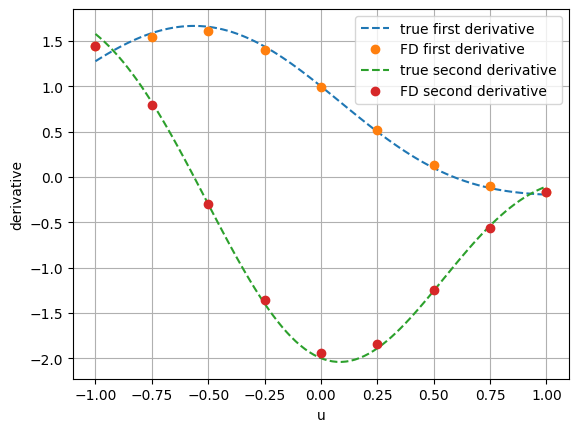

In [28]:
# Check this gives appropriate derivatives for the given test function:
def check_finite_difference_derivative_matrices_with_given_example(num_steps, a, b) :
    phi_func = lambda u: np.exp(-u*u) + np.sin(u)
    Dphi_func = lambda u: - 2.0 * u * np.exp(-u*u) + np.cos(u)
    D2phi_func = lambda u: (4.0 * u ** 2.0 - 2.0) * np.exp(-u*u) - np.sin(u)
    check_finite_difference_derivative_matrices(num_steps, a, b, phi_func, Dphi_func, D2phi_func)

check_finite_difference_derivative_matrices_with_given_example(num_steps=8, a=-1.0, b=1.0)

We can see that using $9$ points is not enough to have a good approximation using the finite difference matrix. For example, the value at `x=-0.75` is visibly off from the true value.

Recall that this is the result for the pseudospectral derivative matrix:

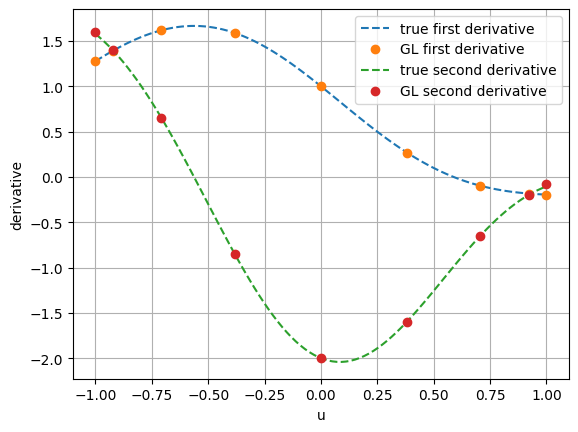

In [29]:
check_pseudospectral_derivative_matrices()

The pseudospectral derivative matrix approximates the true derivative function very well for $9$ points.

Let's try to increase the number of points for the finite difference matrix.

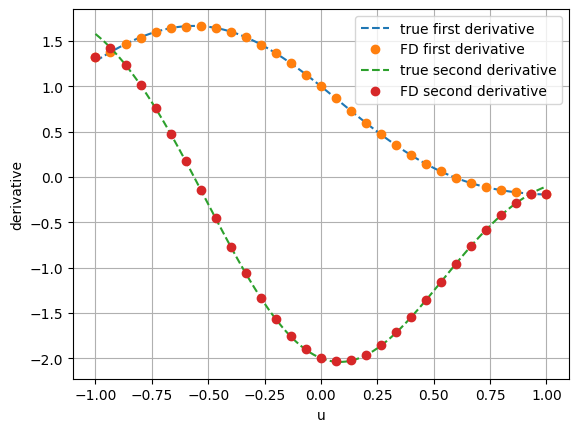

In [30]:
check_finite_difference_derivative_matrices_with_given_example(num_steps=30, a=-1.0, b=1.0)

So using around $31$ points the approximation is good enough, except for the ends of the $2^{nd}$ derivative matrix, which seems to coincide with the $1^{st}$. This is because we are using the coefficients for the $1^{st}$ derivative for the one-sided derivative at the ends of the matrix.

Additionally, let's make some plots to check with the breather solution.

First, let's start with the same number of points $N=9$ and interval $[-1, 1]$ in the first example.

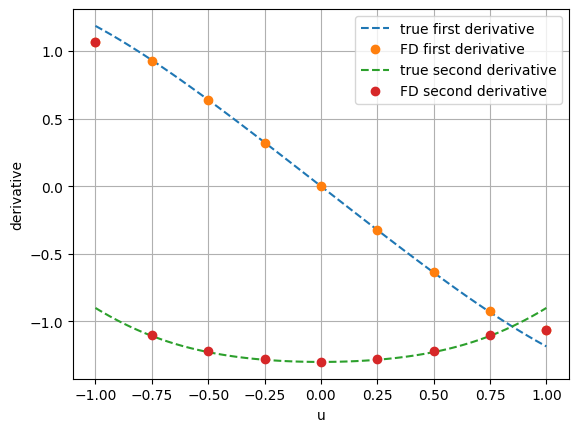

In [31]:
# Check this gives appropriate derivatives for breather solution:
def check_finite_difference_derivative_matrices_on_breather_solution(num_steps=8, a=-1.0, b=1.0) :
    breather = BreatherSolutionCalculator.get_singleton(omega=0.5)
    phi_func = lambda u: breather.compute(x=u, t=0.0)
    Dphi_func = lambda u: breather.compute(x=u, t=0.0, derivative_order=1, independent_variable='x')
    D2phi_func = lambda u: breather.compute(x=u, t=0.0, derivative_order=2, independent_variable='x')
    check_finite_difference_derivative_matrices(num_steps, a, b, phi_func, Dphi_func, D2phi_func)

check_finite_difference_derivative_matrices_on_breather_solution(num_steps=8, a=-1.0, b=1.0)

This time the finite difference matrix seems to approximate the true derivatives very well for $9$ points, except for the ends where we don't have the right boundary conditions.

We know that the derivatives of the breather solution get flat at the far ends, when the absolute value of $x$ is large, so our boundary conditions should approximate much better. Let's try to increase the interval to $[-10, 10]$. Clearly we will need more than $9$ points so let's try $50$.

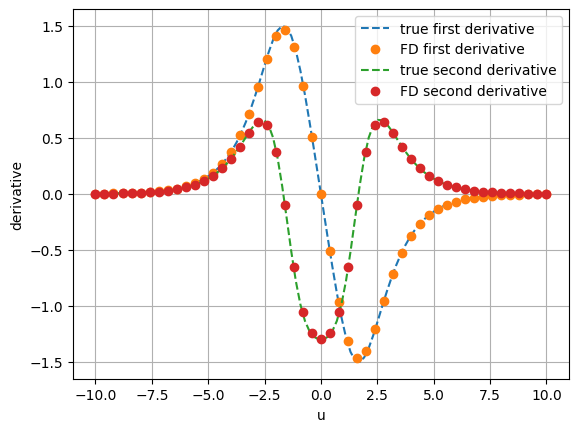

In [32]:
check_finite_difference_derivative_matrices_on_breather_solution(num_steps=50, a=-10.0, b=10.0)

The approximation is good for $50$ points, and the ends are much better than before thanks to the nature of the derivatives function.

#### 2.2.4. Q4 Solving the PDE (40 marks for 4 parts (a)-(d)):

In this section we will solve the PDE in Eq. (1) using the breather solution in Eq. (2) with $t=0$ as initial data. As part of this you should write a class for the Sine Gordon equation that contains the different methods for integrating it in time with a general, user specified initial condition. 

_(HINT: Eq. (2) gives you the profile of the field $\phi(x,0)$ just by setting $t=0$, but you will also need $\frac{\partial\phi(x,t)}{\partial t}$ at $t=0$ which we can get by differentiating the expression with respect to time before setting $t=0$. Your breather class should already contain a function to calculate this!)_

**Q4a**. Explain what type of PDE Eq. (1) is and discuss how this impacts on well-posedness and the way in which we can solve the equation numerically.

<b>Rephrase Q4a:</b>

- Explain what type of PDE Eq. (1) is.
- discuss how this impacts on well-posedness
  - What is well-posedness?
- discuss the way in which we can solve the equation numerically.

<b>Answer Q4a:</b>

<u><b>Part 1 of Q4a:</b></u> Explain what type of PDE Eq. (1) is.
 
  Eq. (1) is a hyperbolic PDE. 
  
  Recall the definition of hyperbolic PDE from Week 10:
  
  Consider the most general second order PDE for 1 dependent variable with 2 independent variables:
  
  \begin{equation}
  A \frac{\partial^2 u}{\partial x^2} + B \frac{\partial^2 u}{\partial x \partial y} + C \frac{\partial^2 u}{\partial y^2} + D \frac{\partial u}{\partial x} + E \frac{\partial u}{\partial y} + F = 0
  \end{equation}

  Let $\Delta = B^2 - 4AC$. A PDE is hyperbolic if $\Delta > 0$.
  
  Recall the PDE in Eq. (1): $ \frac{\partial\varphi^2}{\partial t^2} -\frac{\partial\varphi^2}{\partial x^2}+\sin \varphi =0, \quad (1)$
  
  <!-- \begin{equation}
  \frac{\partial^2 \phi}{\partial x^2} - \frac{\partial^2 \phi}{\partial t^2} + \sin(\phi) = 0
  \end{equation} -->
  
  In this case, we have $A = 1$, $B = 0$, $C = -1$. So $\Delta = 4 > 0$ and the PDE is hyperbolic.
  
  <!-- The equation is classiﬁed based on the discriminant :
  Elliptic
  Parabolic
  Hyperbolic
  A ∂2u
  ∂x2 + 2B ∂2u
  ∂x∂y + C ∂2u
  ∂y2 + D ∂u
  ∂x + E ∂u
  ∂y + F = 0
  Δ = B2 − 4AC
  Δ < 0
  Δ = 0
  Δ > 0 -->

  
  <!-- This means that the solution is determined by specifying initial data on a spacelike hypersurface.  -->

<u><b>Part 2 of Q4a:</b></u> Discuss how the type of PDE affects the well-posedness of Eq. (1).
  
  <!-- The sine-Gordon equation can be well-posed under specific circumstances. -->
  
  From what we learnt in Week 10, theorems in mathematics guarantee the (local) well-posedness of linear and quasi-linear* strongly hyperbolic* and parabolic PDEs.
  
  Therefore the sine-Gordon equation defined by Eq. (1) is (with the right initial conditions and boundary conditions) well-posed.
  
  
  
  <!-- In Week 10, we learnt that, when in a correct numerical implementation one
    increases the resolution and the solution blows up
    faster, that usually implies an ill-posed initial value
    problem. -->
  
  <!-- Recall some points about well-posed problems from Week 10:
    • Theorems in mathematics guarantee the (local) well-posedness of linear and <b>quasi-linear*</b> strongly hyperbolic* and parabolic PDEs.
    
    • Elliptic PDEs do not admit a well-posed IVP. This does not (necessarily) mean they cannot be solved, just that another method may be required.
    
    • When in a correct numerical implementation one
    increases the resolution and the solution blows up
    faster, that usually implies an ill-posed initial value
    problem.
    I exist and
    I am unique
    *We will discuss the exact meaning of these terms next week.
    For now just think of hyperbolic and parabolic equations as generally ok. -->

  
  <!-- The solution is not uniquely determined by the initial data, but also by specifying the initial time derivative of the field.  -->
  
  <!-- This means that we need to specify both the field and its time derivative at $t=0$ in order to solve the PDE.  -->
  
  <!-- This is different to elliptic PDEs, where the solution is determined by specifying the field on a spacelike hypersurface, and parabolic PDEs, where the solution is determined by specifying the field on a timelike hypersurface. -->

<u><b>Part 3 of Q4a:</b></u> Discuss the way in which we can solve the equation numerically.

We can solve the equation numerically using some numerical derivative methods and integration methods.

Possible numerical derivative methods include the pseudospectral and finite difference methods.

Possible integration methods include the explicit/implicit Euler method, the midpoint method the Runge-Kutta method and the (implicit) trapezoidal rule.

A general code to solve the PDE numerically given a numerical derivative method and an integration method is as follows. I defined the static method in `SineGordonPDE` class. It takes a `second_derivative_solver` and an `integration_solver` as arguments. The solvers will be defined in the following sections

In [33]:
# Code the general function

class SineGordonPDE:

  @staticmethod
  def demo_integration_over_time(
    num_x_points, x_first, x_last,
    num_time_points, t_0, delta_t,
    second_derivative_solver_class,
    integration_solver_class,
    tau=1.0,
    omega=0.5,
  ):

    assert x_first < x_last, f"Expect x_first < x_last, got {x_first} >= {x_last}"
    assert num_x_points > 1, f"Expect n_x_points > 1, got {num_x_points}"
    assert delta_t > 0.0, f"Expect delta_t > 0.0, got {delta_t}"
    assert num_time_points >= 1, f"Expect at least 1 time point, got {num_time_points}"

    t_last = t_0 + delta_t * (num_time_points - 1)
    time_points = np.linspace(t_0, t_last, num_time_points)

    # x values depends on the method used.
    # For pseudospectral method, the x values are the Gauss Lobatto nodes.
    # For finite difference method, the x values are evenly spaced.
    second_derivative_solver = second_derivative_solver_class(
      n_x_points=num_x_points, x_first=x_first, x_last=x_last, tau=tau
    )
    x_points = second_derivative_solver.x_points

    breather = BreatherSolutionCalculator.get_singleton(omega=omega)
    phi_0 = breather.compute(x=x_points, t=t_0)
    dphi_0_dt = breather.compute(x=x_points, t=t_0, derivative_order=1, independent_variable='t')
    y_0 = np.concatenate([phi_0, dphi_0_dt])

    solution_phi = integration_solver_class.solve(
      y_0=y_0, n_x_points=num_x_points,
      derivative_function=second_derivative_solver.compute_second_derivative,
      time_points=time_points
    )

    SineGordonPDE.check_solution_phi_shape(solution_phi=solution_phi, num_time_points=num_time_points, num_x_points=num_x_points)

    SineGordonPDE.plot_compare_expected_vs_approximated_result(
      solution_phi=solution_phi, x_points=x_points, time_points=time_points,
      omega=omega, tau=tau, derivative_method=second_derivative_solver.name,
      integration_method=integration_solver_class.name,
      breather=breather, t_stop=t_last, n_time_points=num_time_points, n_x_points=num_x_points,
    )

  @staticmethod
  def check_solution_phi_shape(solution_phi, num_time_points, num_x_points):
    # print(f"Shape of solution phi = {solution_phi.shape}")
    assert solution_phi.shape == (num_time_points, num_x_points), \
      f"Expect solution phi to have shape == {num_time_points, num_x_points}, got {solution_phi.shape}"

  @staticmethod
  def plot_compare_expected_vs_approximated_result(
    solution_phi, x_points, time_points,
    omega, tau, derivative_method, integration_method,
    breather, t_stop, n_time_points, n_x_points,
  ):
    fig, (axis_left, axis_right) = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(w=20, h=6)

    SineGordonPDE.plot_breather_solution_changing_over_time_expected(
      x_vals=x_points, t_vals=time_points,
        breather=breather, t_stop=t_stop,
        n_time_points=n_time_points, n_x_points=n_x_points,
        axis=axis_left
    )

    SineGordonPDE.plot_breather_solution_changing_over_time_approximated_result(
      phi=solution_phi, x_vals=x_points, t_vals=time_points,
      omega=omega, tau=tau, derivative_method=derivative_method,
      integration_method=integration_method,
      axis=axis_right
  )

  @staticmethod
  def plot_breather_solution_changing_over_time_expected(
    x_vals, t_vals, breather,
    t_stop, n_time_points, n_x_points,
    axis
  ):
    phi = breather.compute(x=x_vals, t=t_vals)
    # phi = phi.T # transpose so that phi[i] is the solution at time t[i]
    title = f"Expected Result - Breather solution : omega={breather.omega}, t = {t_stop:.2f}, n_timepoints={n_time_points}, n_x_points={n_x_points}"
    SineGordonPDE.plot_solution_over_time(phi=phi, x_vals=x_vals, t_vals=t_vals, axis=axis, title=title)

  @staticmethod
  def plot_breather_solution_changing_over_time_approximated_result(
    x_vals, t_vals, phi,
    omega, tau, derivative_method, integration_method,
    axis
  ):
    title = f"Breather solution phi(x, t) (omega={omega}), tau = {tau}, \n{derivative_method}, {integration_method}"
    SineGordonPDE.plot_solution_over_time(phi=phi, x_vals=x_vals, t_vals=t_vals, axis=axis, title=title)
    if len(t_vals) <= 10:
      axis.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

  @staticmethod
  def plot_solution_over_time(
    phi, x_vals, t_vals,  axis, title
  ):
    alpha = 0.8
    for i_t, t in enumerate(t_vals):
      alpha = alpha * (len(t_vals) - i_t) / len(t_vals)
      axis.plot(
        x_vals,
        phi[i_t],
        label=f"t = {t:.2f}",
        alpha=alpha + 0.2
      )

    axis.plot(
      x_vals,
      np.zeros_like(x_vals),
      'o',
      label=f"sampled points",
    )

    axis.set_xlabel(r"$x$")
    axis.set_ylabel(r"$\varphi(x, t)$")
    axis.set_title(title)
    # axis.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
    axis.grid()

**Q4b**. Solve the equation using finite differences with a fixed grid spacing and the explicit midpoint/RK2 time integration method. Discuss the CFL condition and how it applies here. Confirm that the solution remains stationary (although oscillating in time).
   
_(HINT: you can reuse the derivative matrices from part 2.2.3!)_

<b>Breakdown Q4b:</b>

- Solve the equation using 
  - finite differences with a fixed grid spacing and 
  - the explicit midpoint/RK2 time integration method. 
  
- Discuss the CFL condition and how it applies here. 

- Confirm that the solution remains stationary (although oscillating in time).
   
<!-- _(HINT: you can reuse the derivative matrices from part 2.2.3!)_ -->

<!-- <span style="color:red"> -->
<!-- <b>Answer Q4b:</b>

For our problem, the CFL condition says that the timestep must be less than the grid spacing. -->

<!-- </span> -->




<b>Answer Q4b:</b>

<u><b>Part 1 of Q4b:</b></u> Solve the equation using finite differences with a fixed grid spacing and the explicit midpoint/RK2 time integration method.

For the derivative, I will use the finite difference matrix for the $2^{nd}$ derivative with fourth order accurate stencil.

For the integration, I will use the explicit midpoint method.

Let's define a class to solve the second derivative using finite differences with a fixed grid spacing.

I define the class `FiniteDifferenceSecondDerivativeSolver`. It takes the number of points and the start and end $x$ values, as well as `tau`.

It will create the equally spaced $x$ values and the finite difference matrix. Finally, it will solve the second derivative for a particular `t` and `y` using the finite difference matrix.

In [34]:
class FiniteDifferenceSecondDerivativeSolver:

  def __init__(self, n_x_points, x_first, x_last, tau=1.0):
    self.tau = tau
    self.name = "Finite Difference"

    # If n_x_points=10 --> Too few x points to evaluate the derivative accurately for finite difference??? errors accumulate quickly???
    # If x_first=-1.0, x_last=1.0 --> This phi values are not equal to 0 at the ends, so the derivative is not zero at the ends!!!!!

    self.x_points = np.linspace(start=x_first, stop=x_last, num=n_x_points)

    self.D2_matrix = get_finite_difference_derivative_matrix(
      n_points_used_for_approximation=n_x_points,
      x_first=x_first, x_last=x_last,
      derivative_order=2,       # 2nd derivative
      stencil_order=4      # 4th order stencil  (5 points to evaluate the derivative at a point)
    )

  def compute_second_derivative(self, t, y):
    D2_matrix = self.D2_matrix
    [phi, dphi_dt] = np.array_split(y, 2)
    d2phi_dt2 = np.dot(D2_matrix, phi) - np.sin(phi)

    # Zero the derivatives at the end for stability
    # (especially important in the pseudospectral method)
    d2phi_dt2[0] = 0.0
    d2phi_dt2[1] = 0.0
    d2phi_dt2[-1] = 0.0
    d2phi_dt2[-2] = 0.0

    d2phi_dt2 *= self.tau  # Do I need this? tau is the coefficient of the nonlinear term???
    return np.concatenate([dphi_dt, d2phi_dt2])

Next, let's define a class to represent the explicit midpoint integration method. 

In [35]:
class MidpointIntegrationSolver:

  name = "Midpoint"

  def solve(
      y_0, n_x_points, time_points,
      derivative_function):
    solution_y = np.zeros((len(time_points), len(y_0)))
    solution_y[0] = y_0                                             # First row is initial conditions
    for (i_t_next, t_next) in enumerate(time_points[1:], start=1):  # Start iterating from second row
      y_t = solution_y[i_t_next - 1]
      t = time_points[i_t_next - 1]
      delta_t = t_next - t    # Does not assume constant time step size

      dy_dt = derivative_function(t=t, y=y_t)
      y_t_plus_half = y_t + dy_dt * (0.5 * delta_t)
      t_plus_half = t + 0.5 * delta_t
      dy_dt_plus_half = derivative_function(t=t_plus_half, y=y_t_plus_half)

      y_t_next = y_t + dy_dt_plus_half * delta_t
      solution_y[i_t_next] = y_t_next

    # Take the first n_x_points columns of solution_phi
    # n_x_points may NOT be the same as len(initial_conditions)
    solution_phi = solution_y[:, 0 : n_x_points]
    return solution_phi

Finally, let's combine them to solve the PDE and plot the result.

For the first example, I will use the following parameters. Note the value for `delta_t`.

- $N=60$ points in the interval $[-15, 15]$
- $30$ time points, starting at $t=0$, `delta_t` $= 0.345$
- `tau` $= 1.0$

In [ ]:
SineGordonPDE.demo_integration_over_time(
  num_x_points=60, x_first=-15.0, x_last=15.0,
  num_time_points=30, t_0=0.0, delta_t=0.345,
  second_derivative_solver_class=FiniteDifferenceSecondDerivativeSolver,
  integration_solver_class=MidpointIntegrationSolver,
  tau=1.0, omega=0.5,
)

In this example, the CFL condition is not satisfied. We can see that the solution is not stable, it blows up. This is because the timestep size is too large.

Recall what we learnt in Week 10: Problems with PDEs - Von Neumann stability and the CFL (Courant Friedrich Lewy) condition

Like for ODEs, numerical schemes for PDEs can be unstable, and they have to be analysed for each PDE and PDE scheme separately.

For an initial value problem (IVP), this usually results in a “CFL condition” on the time step of the form $\Delta t = λ \Delta x$ for hyperbolic equations.

The main method to determine the CFL number $λ$ is called the Von Neumann stability analysis. It is a is necessary but not suﬃcient condition for stability.

<!-- • Just by physical arguments, for disturbances travelling at a speed of c we should expect
, and our physical/mathematical intuition can always do the job for us - starting with
our intuitive stability condition, we could use trial and error to ﬁnd how high/low can be
before the code becomes numerically unstable -->

<b>Von Neumann stability analysis</b>

Method:

1. Assume a harmonic perturbation of the form

$$u(x, t) = exp(i[ωt − kx])$$

2. Calculate for the given numerical scheme the ampliﬁcation factor between timesteps

$$Λ = \frac{u_i^{n+1}}{u_i^n}$$

3. Require $| Λ | ≤ 1$ for the solution to not be ampliﬁed, which gives rise to a condition $\Delta t = λ \Delta x$ 

<!-- where is the CFL number
u(x, t) = exp(i[ωt − kx])
Λ = un+1
i
un
i
| Λ | ≤ 1
Δt = λΔx λ -->

To get a better approximation, I will use the following:

- $N=60$ points in the interval $[-15, 15]$
- $30$ time points, starting at $t=0$, `delta_t` $= 0.1$
- `tau` $= 1.0$

type(n_order_derivative_stencil) = <class 'sympy.core.numbers.Zero'>
type(poly) = <class 'sympy.polys.polytools.Poly'>
type(n_order_derivative_stencil) = <class 'sympy.core.mul.Mul'>
type(poly) = <class 'sympy.polys.polytools.Poly'>
type(n_order_derivative_stencil) = <class 'sympy.core.mul.Mul'>
type(poly) = <class 'sympy.polys.polytools.Poly'>
type(n_order_derivative_stencil) = <class 'sympy.core.mul.Mul'>
type(poly) = <class 'sympy.polys.polytools.Poly'>


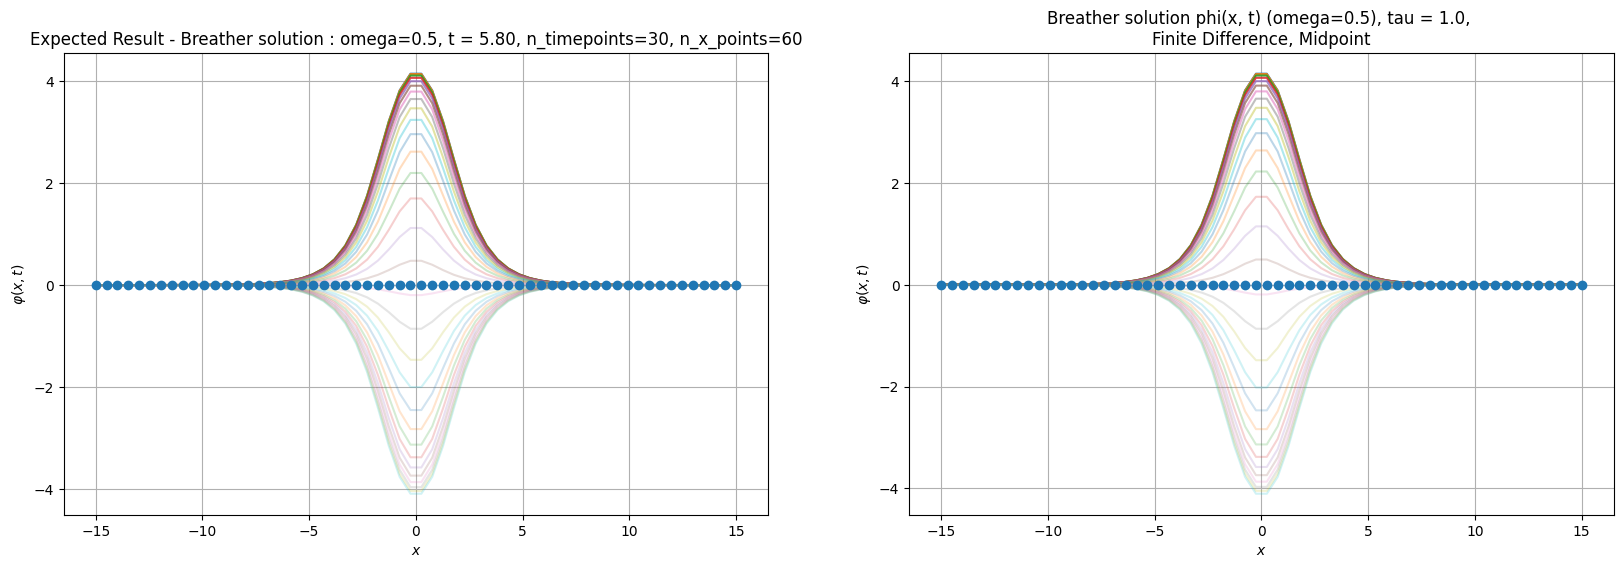

In [36]:
SineGordonPDE.demo_integration_over_time(
  num_x_points=60, x_first=-15.0, x_last=15.0,
  num_time_points=30, t_0=0.0, delta_t=0.2,
  second_derivative_solver_class=FiniteDifferenceSecondDerivativeSolver,
  integration_solver_class=MidpointIntegrationSolver,
  tau=1.0, omega=0.5,
)

As we can see, the solution stays stationary (although oscillating in time).

**Q4c**. Now solve the equation using pseudospectral derivatives and the python method `scipy.integrate.solve_ivp`. What are the advantages and disadvantages of using pseudospectral derivatives? What is the time integration method usually used by `scipy.integrate.solve_ivp` and how does this avoid potential instabilities?
   
   _(HINT: you can reuse the derivative matrices from 2.2.3! You may find that you need to zero the time derivatives of the field at the outer two points at both end of the grid in order to keep the boundaries stable.)_

<b>Breakdown Q4c</b>:

  - Solve the equation using pseudospectral derivatives and the python method `scipy.integrate.solve_ivp`. 

  - What are the advantages and disadvantages of using pseudospectral derivatives? 

  - What is the time integration method usually used by `scipy.integrate.solve_ivp` and how does this avoid potential instabilities?
   
   <!-- _(HINT: you can reuse the derivative matrices from 2.2.3! You may find that you need to zero the time derivatives of the field at the outer two points at both end of the grid in order to keep the boundaries stable.)_ -->

<b>Answer Q4c:</b>

<u><b>Part 1 of Q4c:</b></u> Solve the equation using pseudospectral derivatives and the python method `scipy.integrate.solve_ivp`.

In [37]:
class PseudospectralDerivativeSolver:

  name = "Pseudospectral method"

  def __init__(self, n_x_points, x_first, x_last, tau=1.0):
    self.x_first = x_first
    self.x_last = x_last
    self.n_x_points = n_x_points
    self.tau = tau

    self.x_points = get_gauss_lobatto_nodes(n_x_points, x_first, x_last)
    self.D2_matrix = self.get_pseudospectral_2nd_derivative_matrix(x_points=self.x_points)


  @staticmethod
  def get_pseudospectral_2nd_derivative_matrix(x_points):

      N = len(x_points) - 1

      indices = np.arange(N+1)

      u_i = np.cos(np.pi * indices / N)

      c_i = np.ones_like(indices)
      c_i[0] = 2.0
      c_i[N] = 2.0

      D2_matrix = np.zeros([N+1,N+1])

      for idx_i in indices :
          for idx_j in indices :
              if((idx_i == idx_j) and (idx_i == 0 or idx_i == N)) :
                  D2_matrix[idx_i,idx_j] = (N ** 4.0 - 1.0) / 15.0

              elif ((idx_i == idx_j) and (idx_i != 0) and (idx_i != N)) :
                  D2_matrix[idx_i,idx_j] = (- ((N*N - 1.0) * (1.0 - u_i[idx_i] * u_i[idx_i]) + 3.0)
                                              / (3.0 * (1.0 - u_i[idx_i] * u_i[idx_i]) ** 2.0))

              elif (idx_i == 0 and idx_j > 0) :
                  D2_matrix[idx_i,idx_j] = ((2.0 / 3.0) * ((-1) ** idx_j) / c_i[idx_j]
                                            * ((2.0 * N * N + 1.0) * (1.0 - u_i[idx_j]) - 6.0)
                                            / (1.0 - u_i[idx_j]) / (1.0 - u_i[idx_j]))

              elif (idx_i == N and idx_j < N) :
                  D2_matrix[idx_i,idx_j] = ((2.0 / 3.0) * ((-1) ** (N+idx_j)) / c_i[idx_j]
                                            * ((2.0 * N * N + 1.0) * (1.0 + u_i[idx_j]) - 6.0)
                                            / (1.0 + u_i[idx_j]) / (1.0 + u_i[idx_j]))

              else :
                  D2_matrix[idx_i,idx_j] = (((-1) ** (idx_i+idx_j)) / c_i[idx_j]
                                              * (u_i[idx_i]*u_i[idx_i] + u_i[idx_i]*u_i[idx_j] - 2.0)
                                              / (1.0 - u_i[idx_i]*u_i[idx_i]) / (u_i[idx_i] - u_i[idx_j])
                                              / (u_i[idx_i] - u_i[idx_j]))

      return D2_matrix



  def compute_second_derivative(self, t, y):
      [phi, dphi_dt] = np.array_split(y, 2)
      # d2phi_dt2 = np.dot(D2_matrix, phi) - np.sin(phi)  # ??? minus before or after zeroing the ends?
      d2phi_dt2 = np.dot(self.D2_matrix, phi)                  # ??? minus before or after zeroing the ends?

      # Zero the derivatives at the end for stability
      # (especially important in the pseudospectral method)
      d2phi_dt2[0] = 0.0
      d2phi_dt2[1] = 0.0
      d2phi_dt2[-1] = 0.0
      d2phi_dt2[-2] = 0.0

      d2phi_dt2 *= (4.0 / (self.x_last - self.x_first) ** 2.0)  # Re-scaling

      d2phi_dt2 -= np.sin(phi)  # ??? minus before or after zeroing the ends?

      d2phi_dt2 *= self.tau  # Do I need this? tau is the coefficient of the nonlinear term???
      return np.concatenate([dphi_dt, d2phi_dt2])

In [38]:
class SolveIvpSolver:
  name = "solve_ivp"
  @staticmethod
  def solve(
      y_0, n_x_points, time_points, derivative_function):
    t_start = time_points[0]
    t_stop = time_points[-1]
    solution = scipy.integrate.solve_ivp(
      fun=derivative_function,
      t_span=(t_start, t_stop),
      t_eval=time_points,
      y0=y_0,
      method='RK45',
      rtol=1e-3,
    )
    solution_y = solution.y

    # n_x_points may NOT be the same as len(initial_conditions)
    solution_phi = solution_y[0 : n_x_points].T
    return solution_phi

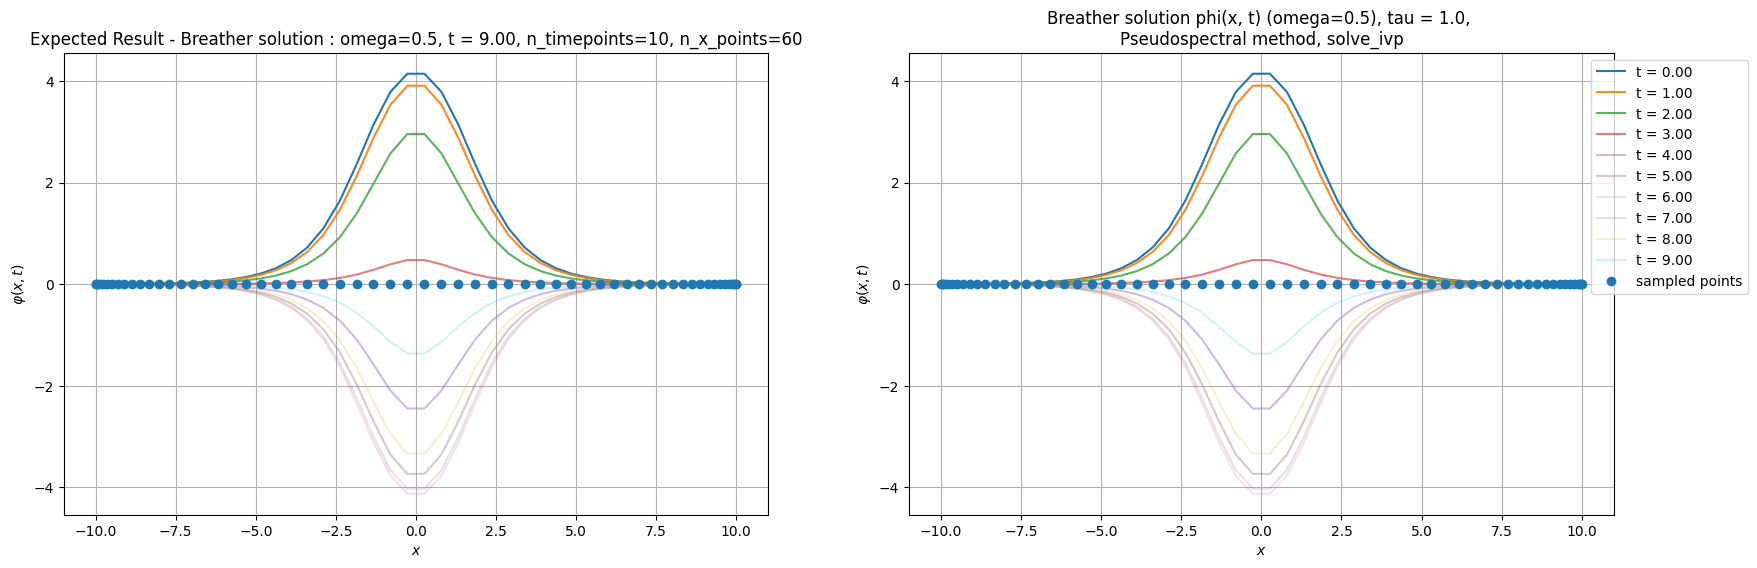

In [39]:
SineGordonPDE.demo_integration_over_time(
  num_x_points=60, x_first=-10.0, x_last=10.0,
  num_time_points=10, t_0=0.0, delta_t=1.0,
  second_derivative_solver_class=PseudospectralDerivativeSolver,
  integration_solver_class=SolveIvpSolver,
  tau=1.0, omega=0.5
)

<u><b>Part 2 of Q4c:</b></u> What are the advantages and disadvantages of using pseudospectral derivatives?

<!-- The advantages of using pseudospectral derivatives are:

  - They are more accurate than finite differences.

  - They are faster than finite differences. -->

  <!-- - <s>They are easier to implement than finite differences.???</s> -->

  <!-- - <s>They are easier to use than finite differences.???</s> -->
<!-- 
  - They are more stable than finite differences.

The disadvantages of using pseudospectral derivatives are:

  - They are more difficult to understand than finite differences. -->

  <!-- - They are more difficult to implement than finite differences. -->

  <!-- - <s>They are more difficult to use than finite differences.???</s> -->
  
  
Advantages of pseudospectral derivatives:

  - Accuracy and efficiency for smooth functions: In our case with the Sine-Gordon equation which is a smooth function, we can see that the pseudospectral method can achieve a given accuracy with fewer grid points compared to finite difference methods

    <!-- Global Information: Pseudospectral methods use global polynomials or Fourier series, which incorporate information from the entire domain, leading to higher accuracy in capturing global features of the solution. -->

  - Boundary conditions: For certain types of boundary conditions, pseudospectral methods can be more straightforward to implement than finite difference methods. In the example in part 2.2.3, we can see that the pseudospectral method gives better approximation at the ends of the interval than the finite difference method.

Disadvantages of pseudospectral derivatives:

  - Complexity in handling non-smooth functions: Pseudospectral methods can perform poorly for functions with discontinuities or sharp gradients (Gibbs phenomenon). This does not apply to our case with the Sine-Gordon equation which is a smooth function.

  - Computational complexity: The global nature of the method can lead to dense matrices (matrices with few zeros), which may be computationally expensive to solve, especially for larger amounts or points. In contrast, finite difference methods lead to sparse matrices (matrices with more zeros, non-zero values around the diagonal only), which are easier solve. In our case, however, we don't see a big difference.

  <!-- - Difficulty with Complex Geometries: Implementing pseudospectral methods on domains with complex geometries can be more challenging compared to finite difference methods. -->

<u><b>Part 3 of Q4c:</b></u> What is the time integration method usually used by `scipy.integrate.solve_ivp` and how does this avoid potential instabilities?

Using information provided by the documentation of `scipy.integrate.solve_ivp` at [https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html), the time integration method usually used by `scipy.integrate.solve_ivp` is the Runge-Kutta method. More specifically, the method is the explicit Runge-Kutta method of order 5(4) or `RK45` for short.

The Runge-Kutta `RK45` method avoids potential instabilities by using adaptive step size.

<!-- </span> -->

**Q4d**. Use either spatial derivative method plus an (implicit) trapezoidal rule for the integration in time. Confirm that the solution remains stationary (although oscillating in time). Summarise the advantages and disadvantages of implicit methods in this context. 
   
   _(HINT You will need to use iteration at each time step to solve the implicit equation for the next step)_.

<b>Breakdown Q4d:</b>

- Use either the finite difference or the pseudospectral spatial derivative method, plus an (implicit) trapezoidal rule for the integration in time.  Confirm that the solution remains stationary (although oscillating in time).

- Summarise the advantages and disadvantages of implicit methods in this context.

<!-- - 1. [ ]  Given $\phi(x, t)$ for $60$ equidistant $x$ values in range $[-10, 10]$ and $t=0$. Using <b>Finite Difference</b> space derivative $\frac{\delta\phi}{\delta x}$ and <b>Trapezoidal Rule</b>, find $\phi(x, t)$ for the same $x$ values but at $10$ equidistant $t$ values in range $[0, 20]$.

- 2. [ ]  Plot $10$ lines of $\phi(x, t)$ for the $10$ different $t$ values. 
         
      - The first one should be the tallest convex line. 
      - Then as $t$ increases, the lines should become shorter and less convex, until it becomes a straight horizontal line on the $x$ axis,
      - and then becomes more concave until it becomes a mirror image of the first line, 
      - and then straightens out again to a horizontal line on the $x$ axis, 
      - and then becomes more convex until it becomes the same as the first line, and repeats.

- 3. [ ]  State the advantages of implicit methods in this context. 

- 4. [ ]  State the disadvantages of implicit methods in this context.
   
   _(HINT You will need to use iteration at each time step to solve the implicit equation for the next step)_. -->


<b>Answer Q4d:</b>

<u><b>Part 1 of Q4d:</b></u> Use either the finite difference or the pseudospectral spatial derivative method, plus an (implicit) trapezoidal rule for the integration in time. Confirm that the solution remains stationary (although oscillating in time).

Similar to what we have done, let's define a class for the implicit trapzoidal rule integration method.

In [40]:
class TrapezoidalIntegrationSolver:
  name = "implicit_trapezoidal_rule"

  @staticmethod
  def trapezoidal_step(calculate_dydt, y_of_t_old, y_of_t_guess, delta_t, tn):
    f = calculate_dydt
    yn = y_of_t_old
    h = delta_t
    f0 = f(tn, yn)
    f1 = f(tn + h, y_of_t_guess)
    y_of_t_new = yn + (h/2) * (f0 + f1)
    return y_of_t_new


  @staticmethod
  def solve(
      y_0, n_x_points, time_points, derivative_function,
  ) :

      t_solution = time_points

      a_num_steps = len(t_solution)
      N_grid = len(y_0)
      y_solution = np.zeros([N_grid, a_num_steps])

      delta_t = time_points[1] - time_points[0]

      calculate_dydt = derivative_function

      for itime, time in enumerate(t_solution) :
          if itime == 0 :
              y_solution[:,itime] = y_0
          else :
              y_of_t_old   = y_solution[:,itime-1]

              x_points = np.linspace(start=-10.0, stop=10.0, num=n_x_points)
              breather = BreatherSolutionCalculator.get_singleton(omega=0.5)
              phi_of_t_guess = breather.compute(x=x_points, t=time)
              dphi_dt_of_t_guess = breather.compute(x=x_points, t=time, derivative_order=1, independent_variable='t')
              y_of_t_guess = np.concatenate((phi_of_t_guess, dphi_dt_of_t_guess))

              # Implement the iterative scheme described in the lecture
              error = 10.0
              error_threshold = 1e-1
              MAX_ERROR = 20.0
              while (error > error_threshold) :
                  y_of_t_new = TrapezoidalIntegrationSolver.trapezoidal_step(
                    calculate_dydt=calculate_dydt, y_of_t_old=y_of_t_old, y_of_t_guess=y_of_t_guess, delta_t=delta_t,
                    tn=t_solution[itime-1]
                  )


                  # If the new guess is the same as the old one we have converged
                  error = np.linalg.norm(y_of_t_guess - y_of_t_new)
                  y_of_t_guess = y_of_t_new

                  # Check it is not getting worse!
                  assert error < MAX_ERROR, 'Non linear iterations not converging!'

              # Now (assuming it has converged) assign the
              # value we found to the solution and continue the time iteration
              # Enforce the boundary conditions
              y_of_t_guess[0] = 0.0
              y_of_t_guess[N_grid-1] = 0.0
              y_solution[:,itime] = y_of_t_guess

      print(f'y_solution.shape = {y_solution.shape}')
      solution_phi = y_solution[0 : n_x_points].T
      print(f'solution_phi.shape = {solution_phi.shape}')
      return solution_phi

I will combine this with the pseudospectral method defined above to solve the PDE. For this demonstration, I will use a large number of time points: $400$ time points with $t$ in the range $[0, 20]$ (so $h = 20/399$). This gives a good approximation of the solution.

I tried to use $300$ time points with $t$ in same range and the solution did not converge. When I reduced the value $\tau$ to $0.1$ the solution converged again, but the rate of convergence is slower.

y_solution.shape = (120, 400)
solution_phi.shape = (400, 60)


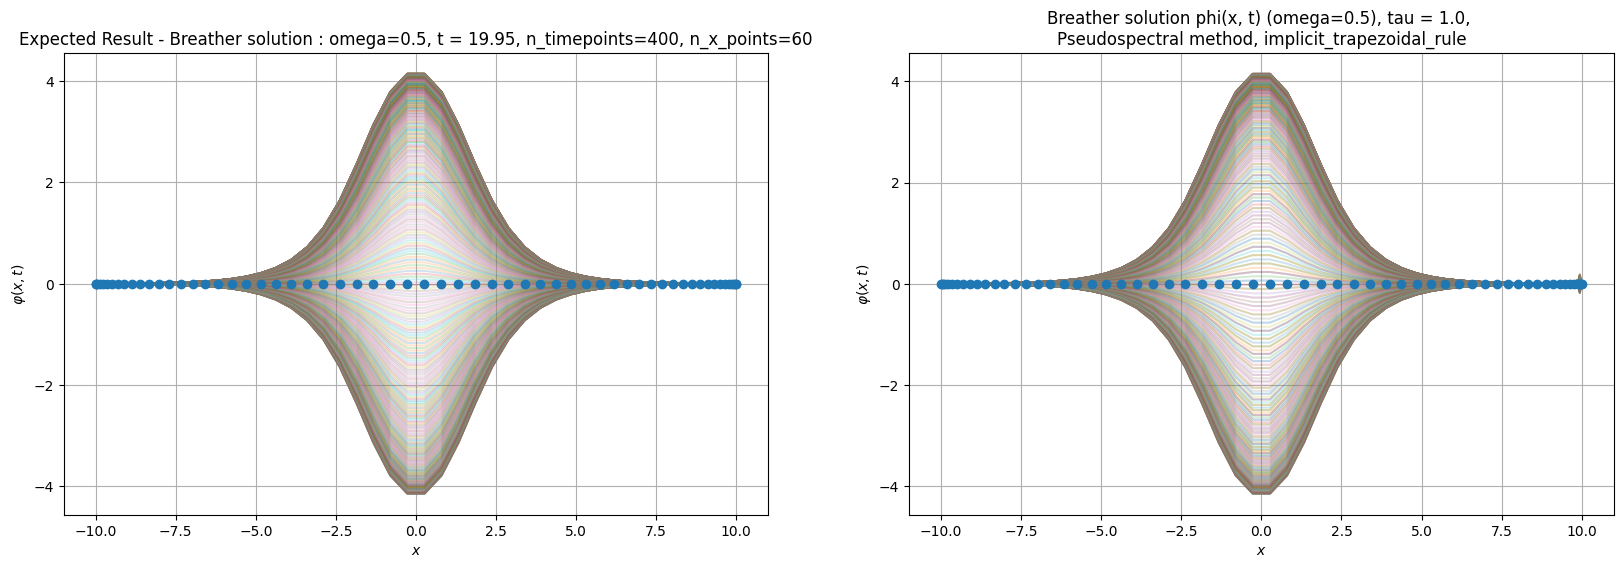

In [41]:
SineGordonPDE.demo_integration_over_time(
  num_x_points=60, x_first=-10.0, x_last=10.0,
  num_time_points=400, t_0=0.0, delta_t=0.05,
  second_derivative_solver_class=PseudospectralDerivativeSolver,
  integration_solver_class=TrapezoidalIntegrationSolver,
  tau=1.0, omega=0.5
)

As we can see, the solution stays stationary (although oscillating in time).

<u><b>Part 2 of Q4d:</b></u>Summarise the advantages and disadvantages of implicit methods in this context.

<!-- Advantages of implicit methods:

  - Stability: Implicit methods are unconditionally stable, which means that the time step size can be arbitrarily large. This is in contrast to explicit methods, which are conditionally stable, which means that the time step size must be small enough to ensure stability.

  - Accuracy: Implicit methods are more accurate than explicit methods. This is because implicit methods use information from the future, whereas explicit methods use information from the past. -->
  

Disadvantages of implicit methods:

  - Computational complexity: Implicit methods can be more computationally expensive than explicit methods. In our case, the implicit trapezoidal rule integration method has a `while` loop to keep "guessing" the next value of $\phi$ until it converges. This is not the case for the explicit midpoint method.

  <!-- - Difficulty in implementation: Implicit methods are more difficult to implement than explicit methods. This is because implicit methods require solving a system of equations at each time step, whereas explicit methods do not. -->

## Appendix

<a id="cached-functions"></a>
### Cached functions ([go back](#go-back-from-cached-functions))

Saving time and memory by computing only once.

In [42]:
# IDEA: Include even DEMO functions for advanced functionalities in the APPENDIX!!!!

from functools import cache
@cache
def a_cached_function(x):
    print("computing...")
    return x

print(a_cached_function(1))

# This will not print "computing..." again
print(a_cached_function(1))

# Add a reference to a stackoverflow answer or something?

computing...
1
1


In [43]:
# Calling it again on a different cell should still not print "computing..." anymore
print(a_cached_function(1))

1


<a id="singleton-pattern"></a>

### Singleton pattern ([go back](#go-back-from-singleton-pattern))

The same idea as cached functions.

In [44]:
# TODO: Demo singleton pattern
# TODO: Write comments that understanding how singleton patterns work are outside the scope of this project

### Sympy symbol equality

In [45]:
# Demo sympy symbol equality

def demo_sympy_symbol_equality():
    x1 = sympy.symbols('x')
    x2 = sympy.symbols('x')
    assert x1 == x2, f"x1 and x2 are not equal. Got x1 = {x1} and x2 = {x2}."
    print(f"x1 and x2 are equal. Both are '{x1}'.")

demo_sympy_symbol_equality()

x1 and x2 are equal. Both are 'x'.


### Sympy `UnevaluatedExpr`

In [46]:
from sympy import symbols, UnevaluatedExpr

x0, x1 = symbols('x0 x1')
expr = UnevaluatedExpr(x0) - UnevaluatedExpr(x1)
expr
sympy.pprint(expr)

x_vals = symbols('x')

x_vals / expr

x₀ - x₁


x*(x0 - x1)**(-1)